# Importación

## Librerías

In [36]:
import sys, pandas as pd, openpyxl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, EngFormatter
import seaborn as sns
import seaborn.objects as so
import numpy as np
import statsmodels.api as sm  # Para el modelo de regresión OLS

## Parquet

In [37]:
df = pd.read_parquet('/Users/gonzalocamunez/Documents/IDE Folder/3. scraper_viviendas/git_scraper_y_análisis_viviendas/1. EDA/df_preparado.parquet')
df.columns

Index(['barrio', 'centro_periferia', 'zona', 'subzona', 'distrito',
       'id_centro_periferia', 'id_zona', 'id_subzona', 'id_distrito',
       'id_metros_cuadrados_rangos', 'precio_en_euros', 'metros_cuadrados',
       'precio_el_metro_cuadrado', 'planta', 'total_estancias',
       'num_dormitorios', 'num_aseos', 'tipo_inmueble', 'planta_rangos',
       'planta_rangos_xl', 'metros_cuadrados_rangos',
       'metros_cuadrados_rangos_xl', 'tipo_planta', 'nuevo_usado',
       'exterior_interior_chalet', 'exterior_interior', 'garaje', 'garaje_num',
       'jardin', 'jardin_num', 'piscina', 'piscina_num', 'terraza',
       'terraza_num', 'trastero', 'trastero_num', 'balcon', 'balcon_num',
       'aire_acondicionado', 'aire_acondicionado_num', 'calefaccion',
       'calefaccion_num', 'ascensor', 'ascensor_num', 'equip_servicios',
       'equip_espacios_de_ocio', 'equip_vistas', 'equip_clima',
       'precio_en_euros_rangos', 'precio_el_metro_cuadrado_rangos'],
      dtype='object')

## Subconjuntos (ALL)

In [38]:
# Outliers precio_el_metro_cuadrado
Q1_precio_el_metro_cuadrado = df['precio_el_metro_cuadrado'].quantile(0.25)
Q3_precio_el_metro_cuadrado = df['precio_el_metro_cuadrado'].quantile(0.75)
IQR_precio_el_metro_cuadrado = Q3_precio_el_metro_cuadrado - Q1_precio_el_metro_cuadrado

outliers_precio_el_metro_cuadrado = (df['precio_el_metro_cuadrado'] < Q1_precio_el_metro_cuadrado - 2*IQR_precio_el_metro_cuadrado) | (df['precio_el_metro_cuadrado'] > Q3_precio_el_metro_cuadrado + 2*IQR_precio_el_metro_cuadrado)
filas_outliers_precio_el_metro_cuadrado = df[outliers_precio_el_metro_cuadrado].index
df_outliers_precio_el_metro_cuadrado = df.loc[filas_outliers_precio_el_metro_cuadrado]
df_outliers_precio_el_metro_cuadrado = df_outliers_precio_el_metro_cuadrado.sort_values(by='precio_el_metro_cuadrado', ascending=True)

df_sin_outliers_precio_el_metro_cuadrado = df.drop(df_outliers_precio_el_metro_cuadrado.index)

# Outliers metros_cuadrados (df)
Q1_metros_cuadrados = df['metros_cuadrados'].quantile(0.25)
Q3_metros_cuadrados = df['metros_cuadrados'].quantile(0.75)
IQR_metros_cuadrados = Q3_metros_cuadrados - Q1_metros_cuadrados

outliers_metros_cuadrados = (df['metros_cuadrados'] < Q1_metros_cuadrados - 2*IQR_metros_cuadrados) | (df['metros_cuadrados'] > Q3_metros_cuadrados + 2*IQR_metros_cuadrados)
filas_outliers_metros_cuadrados = df[outliers_metros_cuadrados].index
df_outliers_metros_cuadrados = df.loc[filas_outliers_metros_cuadrados]
df_outliers_metros_cuadrados =df_outliers_metros_cuadrados.sort_values(by='metros_cuadrados', ascending=True)

df_sin_outliers_metros_cuadrados = df.drop(df_outliers_metros_cuadrados.index)

# Outliers metros_cuadrados (df_pisos)
df_pisos = df[df['tipo_inmueble'] == 'piso']
Q1_metros_cuadrados = df_pisos['metros_cuadrados'].quantile(0.25)
Q3_metros_cuadrados = df_pisos['metros_cuadrados'].quantile(0.75)
IQR_metros_cuadrados = Q3_metros_cuadrados - Q1_metros_cuadrados

outliers_pisos_metros_cuadrados = (df_pisos['metros_cuadrados'] < Q1_metros_cuadrados - 3*IQR_metros_cuadrados) | (df_pisos['metros_cuadrados'] > Q3_metros_cuadrados + 3*IQR_metros_cuadrados)
filas_pisos_outliers_metros_cuadrados = df_pisos[outliers_pisos_metros_cuadrados].index
df_pisos_outliers_metros_cuadrados = df_pisos.loc[filas_pisos_outliers_metros_cuadrados]
df_pisos_outliers_metros_cuadrados =df_pisos_outliers_metros_cuadrados.sort_values(by='metros_cuadrados', ascending=True)
num_outliers = outliers_pisos_metros_cuadrados.sum()

df_pisos_sin_outliers_metros_cuadrados = df_pisos.drop(df_pisos_outliers_metros_cuadrados.index)

# Outliers total_estancias
Q1_total_estancias = df['total_estancias'].quantile(0.25)
Q3_total_estancias = df['total_estancias'].quantile(0.75)
IQR_total_estancias = Q3_total_estancias - Q1_total_estancias

outliers_total_estancias = (df['total_estancias'] < Q1_total_estancias - 2*IQR_total_estancias) | (df['total_estancias'] > Q3_total_estancias + 2*IQR_total_estancias)
filas_outliers_total_estancias = df[outliers_total_estancias].index
df_outliers_total_estancias = df.loc[filas_outliers_total_estancias]
df_outliers_total_estancias =df_outliers_total_estancias.sort_values(by='total_estancias', ascending=True)

df_sin_outliers_total_estancias = df.drop(df_outliers_total_estancias.index)

### Columnas por categoría de datos
location_cols = ['barrio', 'centro_periferia', 'zona', 'subzona', 'distrito']
id_cols = ['id_centro_periferia', 'id_zona', 'id_distrito', 'id_metros_cuadrados_rangos']
price_sqm_cols = ['precio_en_euros', 'metros_cuadrados', 'precio_el_metro_cuadrado']
planta_y_estancias_cols = ['planta', 'total_estancias', 'num_dormitorios', 'num_aseos']
categ_cols = ['tipo_inmueble', 'planta_rangos', 'planta_rangos_xl', 'metros_cuadrados_rangos', 'metros_cuadrados_rangos_xl', 'precio_en_euros_rangos', 'precio_el_metro_cuadrado_rangos', 'tipo_planta', 'nuevo_usado', 'exterior_interior_chalet', 'exterior_interior']
equip_cols = ['garaje', 'jardin', 'piscina', 'terraza', 'trastero', 'balcon', 'aire_acondicionado', 'calefaccion', 'ascensor']
equip_cols_num = ['garaje_num', 'jardin_num', 'piscina_num', 'terraza_num', 'trastero_num', 'balcon_num', 'aire_acondicionado_num', 'calefaccion_num', 'ascensor_num']
equip_cols_agg = ['equip_servicios', 'equip_espacios_de_ocio', 'equip_vistas', 'equip_clima']

ascensor_col = ["ascensor"]
servicios_cols = ["garaje", "trastero"]
espacios_de_ocio_cols = ['jardin', 'piscina']
vistas_cols = ['balcon', 'terraza']
clima_cols = ['aire_acondicionado', 'calefaccion']

data_cols = location_cols + price_sqm_cols + planta_y_estancias_cols + categ_cols + equip_cols

### Columnas por 'zona' y 'subzona'
zonas = (df.sort_values('id_zona')['zona'].drop_duplicates().to_numpy()).tolist()  # único y ordenado por id_zona
subzonas = (df.sort_values('id_subzona')['subzona'].drop_duplicates().to_numpy()).tolist()  # único y ordenado por id_zona

## Ordenaciones

planta_rangos_orden = df['planta_rangos'].value_counts().index
tipo_inmueble_orden = df['tipo_inmueble'].value_counts().index
centro_periferia_orden = df['centro_periferia'].value_counts().index
zonas_orden = list(df['zona'].value_counts().index)
subzonas_centro_orden = ['centro-medio','centro-centro','centro-norte','centro-sur']
subzonas_periferia_orden = ['sur', 'este', 'oeste', 'norte']
subzonas_orden = ['centro-medio','centro-centro','centro-sur','centro-norte','norte', 'oeste', 'este', 'sur']
subzonas_orden_pal = ['centro-norte','centro-medio','centro-centro','centro-sur','norte', 'oeste', 'este', 'sur']
subzonas_orden_count = ['centro-medio', 'centro-centro', 'sur', 'este', 'oeste', 'centro-norte','norte', 'centro-sur']
zonas_orden_count = ['sur', 'este', 'norte','oeste']
planta_rangos_orden = ['-1 Semi-sótano', '0 (Bajo)', '0 (Chalet)', '1º', '2º', '3º', '4º', '5º', '6º o 7º', '8º o más']
planta_rangos_xl_orden = ['0 (Bajo o Semi-S.)', '0 (Chalet)', '1º - 3º', '4º - 5º', '6º o 7º', '8º o más']
planta_pisos_rangos_xl_orden = ['0 (Bajo o Semi-S.)', '1º - 3º', '4º - 5º', '6º o 7º', '8º o más']
metros_cuadrados_rangos_orden = ['0-35', '36-60', '61-75', '76-100', '101-120', '121-150', '151-200', '201-250', '251-300', '301-500', '501<']
metros_cuadrados_rangos_xl_orden = ['0-30' , '31-60', '61-120', '121-240', '241-500', '501<']
exterior_interior_chalet_orden = ['exterior', 'interior', 'chalet']
precio_en_euros_rangos_orden = ['10% más caro (Percentil 90)', '15% caro-intermedio','50% central (IQR)','15% barato-intermedio','10% más barato (Percentil 10)']
precio_el_metro_cuadrado_rangos_orden = ['10% pmc más alto (Percentil 90)', '15% pmc caro-intermedio', '50% pmc central (IQR)', '15% pmc barato-intermedio', '10% pmc más bajo (Percentil 10)']
nuevo_usado_orden = ['obra_nueva', 'obra_usada', 'para_reformar']
exterior_interior_orden = ['exterior', 'interior']
zonas_orden_pme = ['centro', 'norte', 'oeste', 'este', 'sur']

distritos_orden_count = df['distrito'].value_counts().index
distritos_orden = ['Tetuán', 'Chamartín', 'Chamberí', 'Barrio de Salamanca', 'Centro', 'Retiro', 'Arganzuela', 'Carabanchel', 'Usera', 'Puente de Vallecas', \
 'Villaverde', 'Villa de Vallecas', 'Ciudad Lineal', 'San Blas', 'Moratalaz', 'Vicálvaro', 'Moncloa', 'Latina', 'Fuencarral', 'Hortaleza', 'Barajas']

subzonas_por_distrito = {
    'centro-norte': ['Tetuán', 'Chamartín'],
    'centro-medio': ['Chamberí', 'Barrio de Salamanca'],
    'centro-centro': ['Centro'],
    'centro-sur': ['Retiro', 'Arganzuela'],
    'sur': ['Carabanchel', 'Usera', 'Puente de Vallecas', 'Villaverde', 'Villa de Vallecas'],
    'este': ['Ciudad Lineal', 'San Blas', 'Moratalaz', 'Vicálvaro'],
    'oeste': ['Moncloa', 'Latina', 'Fuencarral'],
    'norte': ['Hortaleza', 'Barajas']
}


## Paletas

centro_periferia_colors = {
'centro': (0.03137254901960784, 0.4126259131103421, 0.6859669357939254),
'periferia': (0.9, 0.2, 0.3)
}

subzona_colors = {
    # Del primer loop (zonas principales)
    'sur': (0.90, 0.54, 0.76),  # Inverso cromático de norte
    'este': (0.60, 0.20, 0.40), # Inverso cromático de oeste
    'oeste': (0.65, 0.84, 0.32),
    'norte': (0.12, 0.5, 0.2),
    
    # Del segundo loop (subzonas de centro)
    'centro-norte': (0, 0, 0.2),
    'centro-medio': (0.1, 0.1, 0.9),
    'centro-centro': (0.4, 0.6, 1),
    'centro-sur': (0.1, 1, 1)
    }
zona_colors = {
    # Del primer loop (zonas principales)
    'centro': (0.03137254901960784, 0.4126259131103421, 0.6859669357939254),
    'sur': (0.90, 0.54, 0.76),  # Inverso cromático de norte
    'este': (0.60, 0.20, 0.40), # Inverso cromático de oeste
    'oeste': (0.65, 0.84, 0.32),
    'norte': (0.12, 0.5, 0.2),
}

distrito_colors = {distrito: subzona_colors[subzona] for subzona, distritos in subzonas_por_distrito.items() for distrito in distritos}

precio_en_euros_rangos_colors = {
    '10% más caro (Percentil 90)': (0, 1, 0) ,
    '15% caro-intermedio': (0.1, 0.5, 0.1),
    '50% central (IQR)': (0.5, 0.5, 0.5),
    '15% barato-intermedio': (0.6, 0.2, 0.2),
    '10% más barato (Percentil 10)': (1, 0, 0)
}

precio_el_metro_cuadrado_rangos_colors = {
    '10% pmc más alto (Percentil 90)': (0, 1, 0) ,
    '15% pmc caro-intermedio': (0.1, 0.5, 0.1),
    '50% pmc central (IQR)': (0.5, 0.5, 0.5),
    '15% pmc barato-intermedio': (0.6, 0.2, 0.2),
    '10% pmc más bajo (Percentil 10)': (1, 0, 0)
}


### Paletas planta_rangos
metros_cuadrados_rangos_colors = dict(zip(metros_cuadrados_rangos_orden, sns.color_palette('winter', n_colors=len(metros_cuadrados_rangos_orden))))
metros_cuadrados_rangos_xl_colors = dict(zip(metros_cuadrados_rangos_xl_orden, sns.color_palette('winter', n_colors=len(metros_cuadrados_rangos_xl_orden))))
planta_rangos_colors = dict(zip(planta_rangos_orden, sns.color_palette('magma_r', n_colors=len(planta_rangos_orden))))
planta_rangos_xl_colors = dict(zip(planta_rangos_xl_orden, sns.color_palette('magma_r', n_colors=len(planta_rangos_xl_orden))))
tipo_inmueble_colors = {'piso': (0.2, 0.6, 1),'chalet': (1, 0.5, 0.6)}
exterior_interior_colors = dict(zip(exterior_interior_orden, sns.color_palette('Greens', n_colors=len(exterior_interior_orden))))
nuevo_usado_colors = dict(zip(nuevo_usado_orden, sns.color_palette('dark:salmon_r', n_colors=len(nuevo_usado_orden))))


### Paletas con_sin
sns.color_palette("Paired")
paleta = sns.color_palette("Paired")
mis_colores = [paleta[3], paleta[2], paleta[4], paleta[5]]
con_sin_colors = {
    'concon': (0.1, 0.5, 0.1),
    'consin': (0.1, 0.7, 0.1),
    'sincon': (0.2, 0.9, 0.2),
    'sinsin': (0.9, 0.1, 0.1)
}
con_sin_colors_list = [
    con_sin_colors['concon'],
    con_sin_colors['consin'],
    con_sin_colors['sincon'],
    con_sin_colors['sinsin']
]
ascensor_orden = ['con ascensor', 'sin ascensor']
equip_servicios_orden = ['con garaje, con trastero','con garaje, sin trastero', 'sin garaje, con trastero', 'sin garaje, sin trastero']
equip_espacios_de_ocio_orden = ['con jardín, con piscina','con jardín, sin piscina', 'sin jardín, con piscina','sin jardín, sin piscina']
equip_vistas_orden = ['con balcon, con terraza', 'con balcon, sin terraza', 'sin balcon, con terraza', 'sin balcon, sin terraza']
equip_clima_orden = ['con aire acond., con calefacción','con aire acond., sin calefacción', 'sin aire acond., con calefacción','sin aire acond., sin calefacción']

orden_colors = [con_sin_colors_list[0], con_sin_colors_list[1], con_sin_colors_list[2], con_sin_colors_list[3]]
ascensor_colors = [con_sin_colors_list[0], con_sin_colors_list[3]]
equip_servicios_colors = orden_colors
equip_espacios_de_ocio_colors = orden_colors
equip_vistas_colors = orden_colors
equip_clima_colors = orden_colors


## DataFrames por filas

### Sub DataFrames por `zona` y `subzona`
df_centro = df[df['centro_periferia'] == 'centro']
df_periferia = df[df['centro_periferia'] == 'periferia']
df_zcentro = df[df['zona'] == 'centro']
df_zsur = df[df['zona'] == 'sur']
df_zeste = df[df['zona'] == 'este']
df_zoeste = df[df['zona'] == 'oeste']
df_znorte = df[df['zona'] == 'norte']

### Sub DataFrames por `tipo_inmueble`:
df_chalets = df[df['tipo_inmueble'] == 'chalet']
df_pisos = df[df['tipo_inmueble'] == 'piso']

# Pisos más baratos (en precio absoluto)
P10_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.10)
P20_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.20)
# Pisos más caros (en precio absoluto)
P80_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.80)
P90_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.90)

# IQR_pisos_precio_en_euros = Pisos ni caros ni baratos (en precio absoluto)
Q1_pisos_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.25)
Q3_pisos_precio_en_euros = df_pisos['precio_en_euros'].quantile(0.75)
IQR_pisos_precio_en_euros = Q3_pisos_precio_en_euros - Q1_pisos_precio_en_euros

# df_pisos ni caros ni baratos (50% central)
df_pisos_IQR_precio_en_euros = df_pisos[    (df_pisos['precio_en_euros'] >= Q1_pisos_precio_en_euros - 2*IQR_pisos_precio_en_euros) &
    (df_pisos['precio_en_euros'] <= Q3_pisos_precio_en_euros + 2*IQR_pisos_precio_en_euros)]

# df_pisos baratos
df_pisos_P10_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] < P10_precio_en_euros]
df_pisos_P20_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] < P20_precio_en_euros]
# df_pisos caros
df_pisos_P80_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] > P80_precio_en_euros]
df_pisos_P90_precio_en_euros = df_pisos[df_pisos['precio_en_euros'] > P90_precio_en_euros]

## DataFrames por columnas

### Sub DataFrames de `precios`
df_precios = df[price_sqm_cols]
df_precios_centro = df[price_sqm_cols + ['centro_periferia']]
df_precios_zonas = df[price_sqm_cols + ['zona', 'subzona']]
df_precios_numeric = df[price_sqm_cols + planta_y_estancias_cols]
df_precios_categ = df[price_sqm_cols + categ_cols]
df_precios_equip = df[price_sqm_cols + equip_cols]


### Groupby DataFrames

### `price_sqm_cols` por `zona`
df_gb_precio_y_sqm_por_zonas = df.groupby('zona')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_subzonas = df.groupby('subzona')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_tipo_inmueble = df.groupby('tipo_inmueble')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_planta_rangos = df.groupby('planta_rangos')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_nuevo_usado = df.groupby('nuevo_usado')[price_sqm_cols].agg(['mean', 'std', 'count'])
df_gb_precio_y_sqm_por_exterior_interior_chalet = df.groupby('exterior_interior_chalet')[price_sqm_cols].agg(['mean', 'std', 'count'])
### `price_sqm_cols` por `categ_cols
df_gb_precio_y_sqm_por_garaje = df.groupby('garaje_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por garaje
df_gb_precio_y_sqm_por_jardin = df.groupby('jardin_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por jardin
df_gb_precio_y_sqm_por_piscina = df.groupby('piscina_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por piscina
df_gb_precio_y_sqm_por_terrazas = df.groupby('terraza_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por terraza
df_gb_precio_y_sqm_por_trasteros = df.groupby('trastero_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por trastero
df_gb_precio_y_sqm_por_balcon = df.groupby('balcon_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por balcon
df_gb_precio_y_sqm_por_aire_acondicionado = df.groupby('aire_acondicionado_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por aire_acondicionado
df_gb_precio_y_sqm_por_calefaccion = df.groupby('calefaccion_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por calefaccion
df_gb_precio_y_sqm_por_ascensor = df.groupby('ascensor_num')[price_sqm_cols].agg(['mean', 'std', 'count']) ### Por ascensor

### `planta_y_estancias_cols` por `zona`
df_gb_planta_y_estancias_por_zonas= df.groupby('zona')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_subzonas = df.groupby('subzona')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_tipo_inmueble = df.groupby('tipo_inmueble')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_planta_rangos = df.groupby('planta_rangos')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_nuevo_usado = df.groupby('nuevo_usado')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
df_gb_planta_y_estancias_por_exterior_interior_chalet = df.groupby('exterior_interior_chalet')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count'])
### `planta_y_estancias_cols` por categ_cols
df_gb_planta_y_estancias_por_garaje = df.groupby('garaje_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por garaje
df_gb_planta_y_estancias_por_jardin = df.groupby('jardin_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por jardin
df_gb_planta_y_estancias_por_piscina = df.groupby('piscina_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por piscina
df_gb_planta_y_estancias_por_terrazas = df.groupby('terraza_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por terraza
df_gb_planta_y_estancias_por_trasteros = df.groupby('trastero_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por trastero
df_gb_planta_y_estancias_por_balcon = df.groupby('balcon_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por balcon
df_gb_planta_y_estancias_por_aire_acondicionado = df.groupby('aire_acondicionado_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por aire_acondicionado
df_gb_planta_y_estancias_por_calefaccion = df.groupby('calefaccion_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por calefaccion
df_gb_planta_y_estancias_por_ascensor = df.groupby('ascensor_num')[planta_y_estancias_cols+['metros_cuadrados']].agg(['mean', 'std', 'count']) ### Por ascensor

### `equip_cols_agg` por `precio_en_euros`

## Percentiles para rangos en df total
p20_precio_en_euros = df['precio_en_euros'].quantile(0.25)
p10_precio_en_euros = df['precio_en_euros'].quantile(0.10)
p25_precio_en_euros = df['precio_en_euros'].quantile(0.25)
p75_precio_en_euros = df['precio_en_euros'].quantile(0.75)
p90_precio_en_euros = df['precio_en_euros'].quantile(0.90)
p80_precio_en_euros = df['precio_en_euros'].quantile(0.80)

## Percentiles para rangos df_pisos
p20_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.25)
p10_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.10)
p25_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.25)
p75_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.75)
p90_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.90)
p80_precio_en_euros_pisos = df_pisos['precio_en_euros'].quantile(0.80)

## Crear columna de variable
df['precio_en_euros_rangos'] = None
df.loc[df['precio_en_euros'] <= p10_precio_en_euros, 'precio_en_euros_rangos'] = '10% más barato (Percentil 10)'
df.loc[(df['precio_en_euros'] > p10_precio_en_euros) & (df['precio_en_euros'] <= p25_precio_en_euros), 'precio_en_euros_rangos'] = '15% barato-intermedio'
df.loc[(df['precio_en_euros'] > p25_precio_en_euros) & (df['precio_en_euros'] < p75_precio_en_euros), 'precio_en_euros_rangos'] = '50% central (IQR)'
df.loc[(df['precio_en_euros'] >= p75_precio_en_euros) & (df['precio_en_euros'] < p90_precio_en_euros), 'precio_en_euros_rangos'] = '15% caro-intermedio'
df.loc[df['precio_en_euros'] >= p90_precio_en_euros, 'precio_en_euros_rangos'] = '10% más caro (Percentil 90)'

## Crear dfs de distribución de `precio_en_euros_rangos` para total viviendas
df_P10 = df[df['precio_en_euros'] < p10_precio_en_euros]
df_P20 = df[df['precio_en_euros'] < p20_precio_en_euros]
df_P25 = df[df['precio_en_euros'] < p25_precio_en_euros]
df_P10_P25 = df[(df['precio_en_euros'] >= p10_precio_en_euros) & (df['precio_en_euros'] < p25_precio_en_euros)]
df_IQR = df[(df['precio_en_euros'] >= p25_precio_en_euros) & (df['precio_en_euros'] < p75_precio_en_euros)]  # P25_P75
df_P75_P90 = df[(df['precio_en_euros'] >= p75_precio_en_euros) & (df['precio_en_euros'] < p90_precio_en_euros)]
df_P90 = df[df['precio_en_euros'] >= p90_precio_en_euros]
df_P75 = df[df['precio_en_euros'] < p75_precio_en_euros]
df_P80 = df[df['precio_en_euros'] < p80_precio_en_euros]

## Crear dfs de distribución de `precio_en_euros_rangos` para pisos
df_pisos_P10 = df_pisos[df_pisos['precio_en_euros'] < p10_precio_en_euros_pisos]
df_pisos_P20 = df_pisos[df_pisos['precio_en_euros'] < p20_precio_en_euros_pisos]
df_pisos_P25 = df_pisos[df_pisos['precio_en_euros'] < p25_precio_en_euros_pisos]
df_pisos_P10_P25 = df_pisos[(df_pisos['precio_en_euros'] >= p10_precio_en_euros_pisos) & (df_pisos['precio_en_euros'] < p25_precio_en_euros_pisos)]
df_pisos_IQR = df_pisos[(df_pisos['precio_en_euros'] >= p25_precio_en_euros_pisos) & (df_pisos['precio_en_euros'] < p75_precio_en_euros_pisos)]  # P25_P75
df_pisos_P75_P90 = df_pisos[(df_pisos['precio_en_euros'] >= p75_precio_en_euros_pisos) & (df_pisos['precio_en_euros'] < p90_precio_en_euros_pisos)]
df_pisos_P90 = df_pisos[df_pisos['precio_en_euros'] >= p90_precio_en_euros_pisos]
df_pisos_P75 = df_pisos[df_pisos['precio_en_euros'] < p75_precio_en_euros_pisos]
df_pisos_P80 = df_pisos[df_pisos['precio_en_euros'] < p80_precio_en_euros_pisos]

# IQR_pee
df_IQR_pee_gb_ascensor = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('ascensor').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'ascensor': 'count'})
df_IQR_pee_gb_equip_servicios = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_servicios').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_servicios': 'count'})
df_IQR_pee_gb_equip_espacios_de_ocio = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_espacios_de_ocio').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_espacios_de_ocio': 'count'})
df_IQR_pee_gb_equip_vistas = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_vistas').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_vistas': 'count'})
df_IQR_pee_gb_equip_clima = df[df['precio_en_euros_rangos'] == '50% central (IQR)'].groupby('equip_clima').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_clima': 'count'})

# P10_pee
df_P10_pee_gb_ascensor = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('ascensor').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'ascensor': 'count'})
df_P10_pee_gb_equip_servicios = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_servicios').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_servicios': 'count'})
df_P10_pee_gb_equip_espacios_de_ocio = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_espacios_de_ocio').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_espacios_de_ocio': 'count'})
df_P10_pee_gb_equip_vistas = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_vistas').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_vistas': 'count'})
df_P10_pee_gb_equip_clima = df[df['precio_en_euros_rangos'] == '10% más barato (Percentil 10)'].groupby('equip_clima').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_clima': 'count'})

# P90_pee
df_P90_pee_gb_ascensor = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('ascensor').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'ascensor': 'count'})
df_P90_pee_gb_equip_servicios = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_servicios').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_servicios': 'count'})
df_P90_pee_gb_equip_espacios_de_ocio = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_espacios_de_ocio').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_espacios_de_ocio': 'count'})
df_P90_pee_gb_equip_vistas = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_vistas').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_vistas': 'count'})
df_P90_pee_gb_equip_clima = df[df['precio_en_euros_rangos'] == '10% más caro (Percentil 90)'].groupby('equip_clima').agg({'precio_el_metro_cuadrado': ['mean', 'std'],'metros_cuadrados': ['mean', 'median', 'std'], 'equip_clima': 'count'})


# Outliers precio_en_euros
Q1_precio_en_euros = df['precio_en_euros'].quantile(0.25)
Q3_precio_en_euros = df['precio_en_euros'].quantile(0.75)
IQR_precio_en_euros = Q3_precio_en_euros - Q1_precio_en_euros

outliers_precio_en_euros = (df['precio_en_euros'] < Q1_precio_en_euros - 2*IQR_precio_en_euros) | (df['precio_en_euros'] > Q3_precio_en_euros + 2*IQR_precio_en_euros)
filas_outliers_precio_en_euros = df[outliers_precio_en_euros].index
df_outliers_precio_en_euros = df.loc[filas_outliers_precio_en_euros]
df_outliers_precio_en_euros = df_outliers_precio_en_euros.sort_values(by='precio_en_euros', ascending=False)

df_sin_outliers_precio_en_euros = df.drop(df_outliers_precio_en_euros.index)

## DataFrames Crosstab

### `zona`-`exterior_interior`
#### CONTEOS TOTALES `zona`
df_cross_zona_ext_int_cont = pd.crosstab(    df['zona'],     df['exterior_interior'] )
df_cross_zona_ext_int_cont['total'] = df_cross_zona_ext_int_cont.sum(axis=1)
df_cross_zona_ext_int_cont.loc['Total'] = df_cross_zona_ext_int_cont.sum(axis=0)
#### CONTEOS TOTALES `subzona`
df_cross_subzona_ext_int_cont = pd.crosstab(    df['subzona'],     df['exterior_interior'] )
df_cross_subzona_ext_int_cont['total'] = df_cross_subzona_ext_int_cont.sum(axis=1)
df_cross_subzona_ext_int_cont.loc['Total'] = df_cross_subzona_ext_int_cont.sum(axis=0)
#### % por COLUMNA (cada categoría suma 100%)
df_cross_zona_ext_int_col = pd.crosstab(    df['subzona'],     df['exterior_interior'],    normalize='columns')
df_cross_zona_ext_int_col.loc['Total'] = df_cross_zona_ext_int_col.sum(axis=0)
#### % por FILA (cada zona suma 100%)
df_cross_zona_ext_int_ind = pd.crosstab(    df['zona'],     df['exterior_interior'],    normalize='index')
df_cross_zona_ext_int_ind['total'] = df_cross_zona_ext_int_ind.sum(axis=1)

### `zona`-`planta_rangos`
#### CONTEOS TOTALES `subzona`
df_cross_zona_planta_rangos_cont = pd.crosstab(    df['zona'],     df['planta_rangos'] )
df_cross_zona_planta_rangos_cont['total'] = df_cross_zona_planta_rangos_cont.sum(axis=1)
df_cross_zona_planta_rangos_cont.loc['Total'] = df_cross_zona_planta_rangos_cont.sum(axis=0)
#### % por COLUMNA (cada categoría suma 100%)
df_cross_zona_planta_rangos_col = pd.crosstab(    df['zona'],     df['planta_rangos'],    normalize='columns')
df_cross_zona_planta_rangos_col.loc['Total'] = df_cross_zona_planta_rangos_col.sum(axis=0)
#### % por FILA (cada zona suma 100%)
df_cross_zona_planta_rangos_ind = pd.crosstab(    df['zona'],     df['planta_rangos'],    normalize='index')
df_cross_zona_planta_rangos_ind['total'] = df_cross_zona_planta_rangos_ind.sum(axis=1)
 
### `zona`-`metros_cuadrados_rangos`
#### CONTEOS TOTALES `subzona`
df_cross_zona_metros_cuadrados_rangos_cont = pd.crosstab(    df['zona'],     df['metros_cuadrados_rangos'])
df_cross_zona_metros_cuadrados_rangos_cont['total'] = df_cross_zona_metros_cuadrados_rangos_cont.sum(axis=1)
df_cross_zona_metros_cuadrados_rangos_cont.loc['Total'] = df_cross_zona_metros_cuadrados_rangos_cont.sum(axis=0)
#### % por COLUMNA (cada categoría suma 100%)
df_cross_zona_metros_cuadrados_rangos_col = pd.crosstab(    df['zona'],     df['metros_cuadrados_rangos'],    normalize='columns')
df_cross_zona_metros_cuadrados_rangos_col.loc['Total'] = df_cross_zona_metros_cuadrados_rangos_col.sum(axis=0)
#### % por FILA (cada zona suma 100%)
df_cross_zona_metros_cuadrados_rangos_ind = pd.crosstab(    df['zona'],     df['metros_cuadrados_rangos'],    normalize='index')
df_cross_zona_metros_cuadrados_rangos_ind['total'] = df_cross_zona_metros_cuadrados_rangos_ind.sum(axis=1)


# 3. Mercado

`precio_el_metro_cuadrado` en sus cruces con el resto de variables incluyendo `precio_en_euros` y `metros_cuadrados`, los cuales nos dan una segmentación conjuntamente con el resto de variables de la vivienda.

### LOCALIZACIÓN

#### * pmc + `centro_periferia`, `zona` y `subzona`

centro_periferia
centro       365
periferia    245
Name: count, dtype: Int64

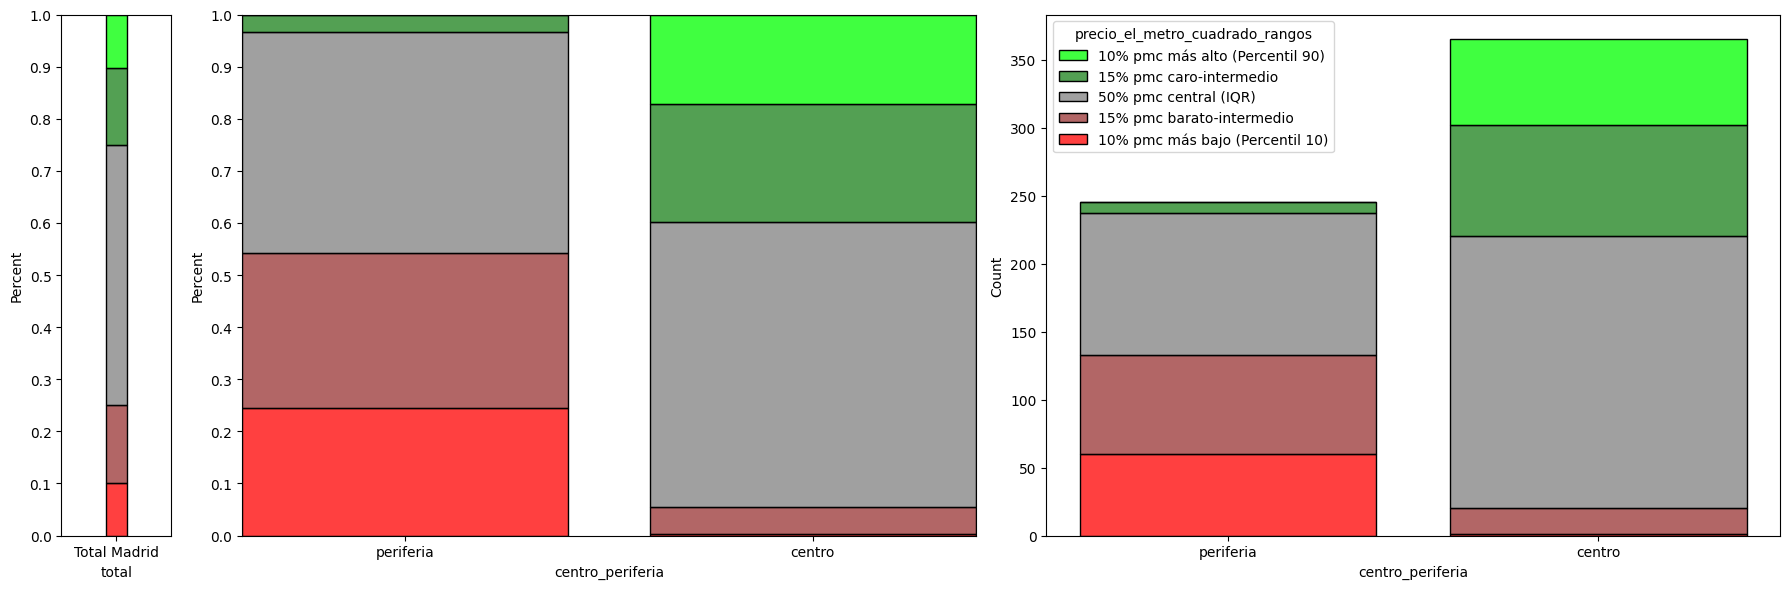

In [39]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="centro_periferia", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.8, )
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="centro_periferia", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1, shrink=0.8,)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
df['centro_periferia'].value_counts()

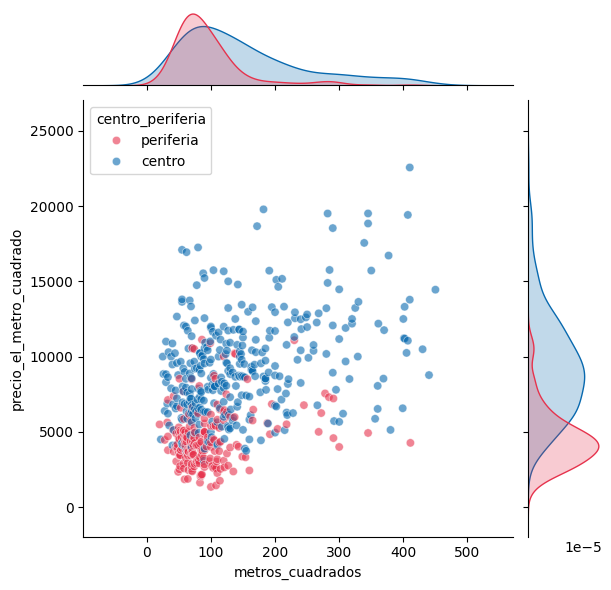

In [40]:
sns.jointplot(data=df_pisos_sin_outliers_metros_cuadrados, x="metros_cuadrados", y="precio_el_metro_cuadrado", 
hue="centro_periferia",kind="scatter", alpha=0.6,  palette=centro_periferia_colors)

zona
centro    365
sur        72
este       69
oeste      56
norte      48
Name: count, dtype: Int64

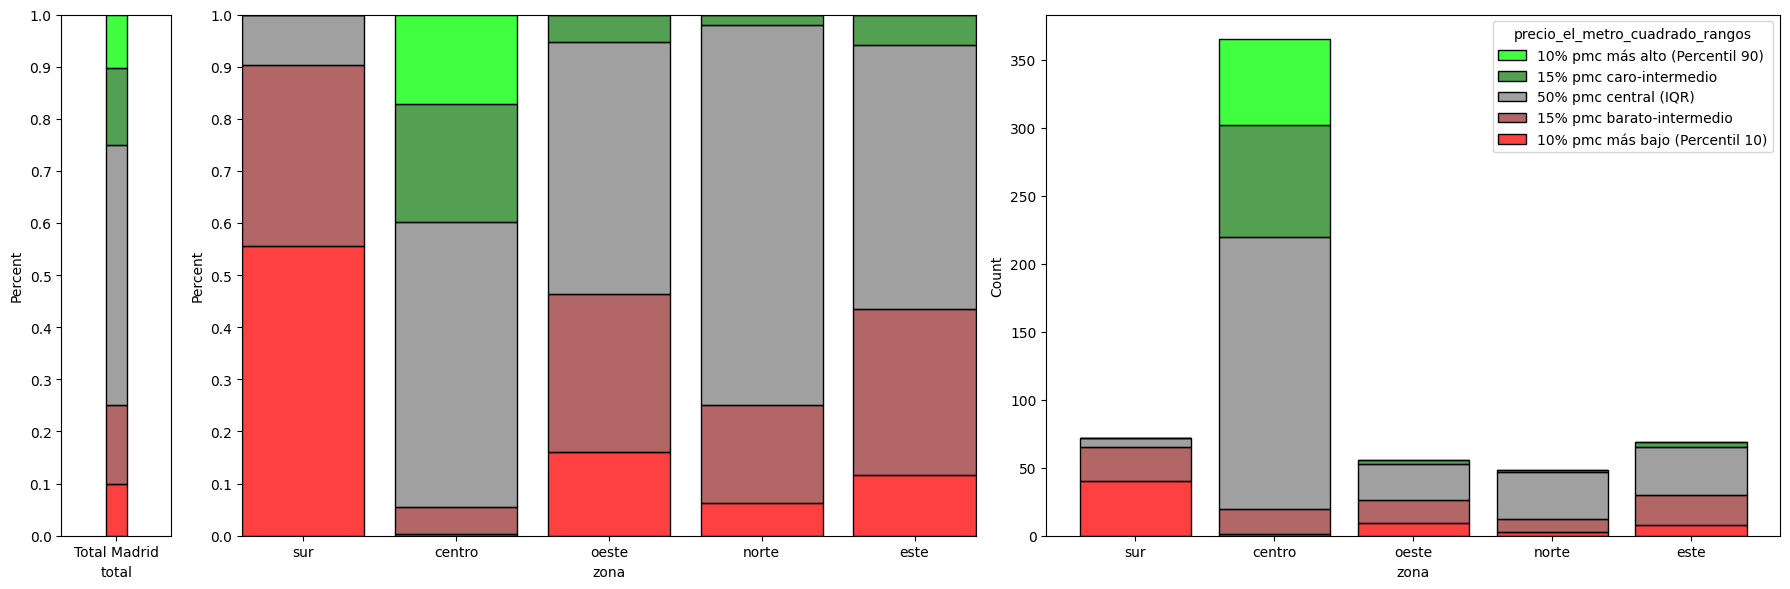

In [41]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="zona", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.8, )
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="zona", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1, shrink=0.8,)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
df['zona'].value_counts()

(-2609.40667662096, 25000.0)

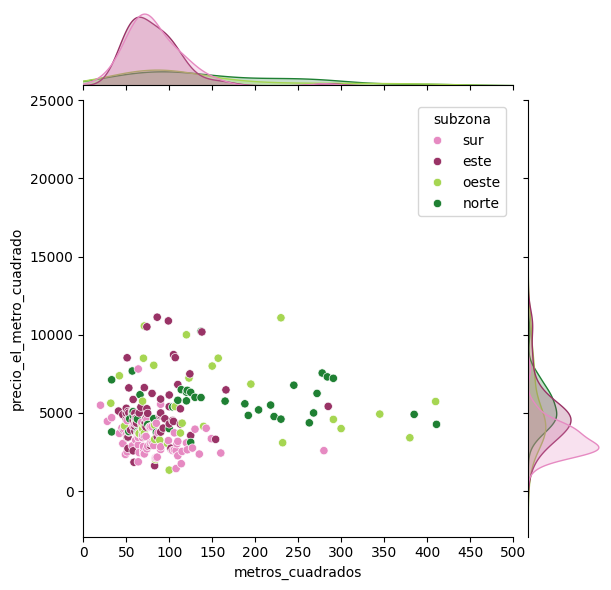

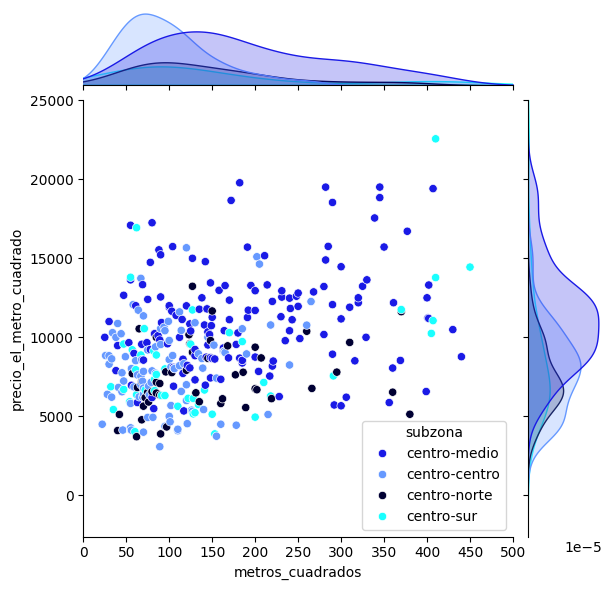

In [42]:
df_plot = df_sin_outliers_metros_cuadrados
sns.jointplot(data=df_plot[df_plot['centro_periferia'] == 'periferia'], x="metros_cuadrados", y="precio_el_metro_cuadrado", hue="subzona", hue_order=subzonas_periferia_orden, palette=subzona_colors)
plt.xlim(0, 500)
plt.xticks(range(0, 501, 50))
plt.ylim(top=25000)
sns.jointplot(data=df_plot[df_plot['centro_periferia'] == 'centro'], x="metros_cuadrados", y="precio_el_metro_cuadrado", hue="subzona", hue_order=subzonas_centro_orden, palette=subzona_colors)
plt.xlim(0, 500)
plt.xticks(range(0, 501, 50));
plt.ylim(top=25000)

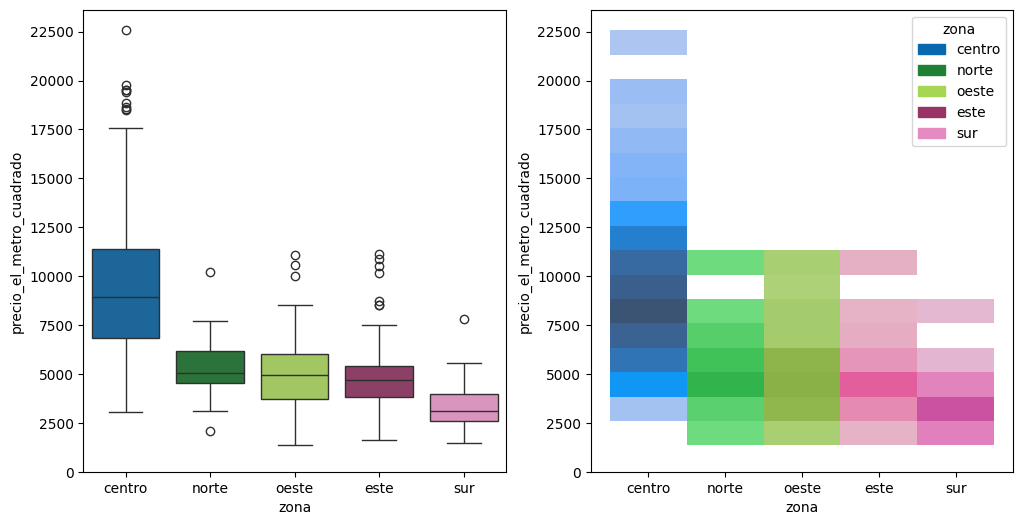

In [43]:
df_plot = df.copy()
df_plot['zona'] = pd.Categorical(df_plot['zona'], categories=zonas_orden_pme, ordered=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df_plot, ax = ax1, x="zona", y="precio_el_metro_cuadrado", hue="zona", palette=zona_colors, order=zonas_orden_pme)
sns.histplot(data=df_plot, ax = ax2, x="zona", y="precio_el_metro_cuadrado", hue="zona", palette=zona_colors, hue_order=zonas_orden_pme)
ax1.set_yticks(range(0, 25000, 2500))
ax2.set_yticks(range(0, 25000, 2500));

#### * pmc + `distrito`

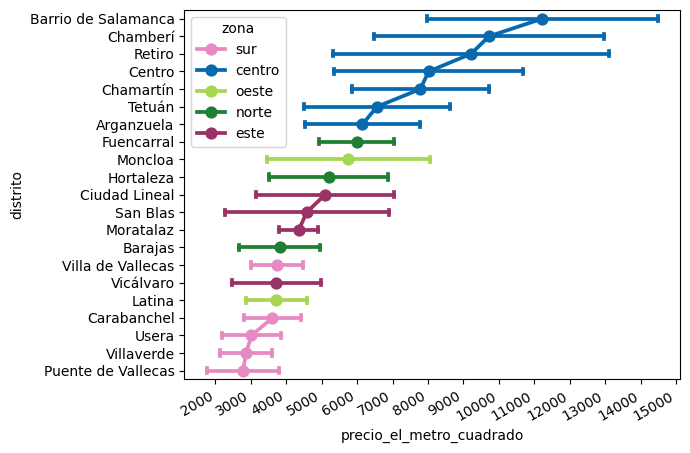

In [44]:
distritos_por_precio = df_pisos.groupby("distrito")["precio_el_metro_cuadrado"].median().sort_values(ascending=False)
sns.pointplot(data=df_pisos, x="precio_el_metro_cuadrado", y="distrito", palette=zona_colors, hue="zona", order=distritos_por_precio.index, estimator=np.median, errorbar="sd", capsize=0.3)
plt.gca().xaxis.set_major_locator(MultipleLocator(1000))
plt.xticks(rotation=30, ha='right');


### CARACTERÍSTICAS

#### * pmc + `tipo_inmueble`

tipo_inmueble
piso      566
chalet     44
Name: count, dtype: Int64

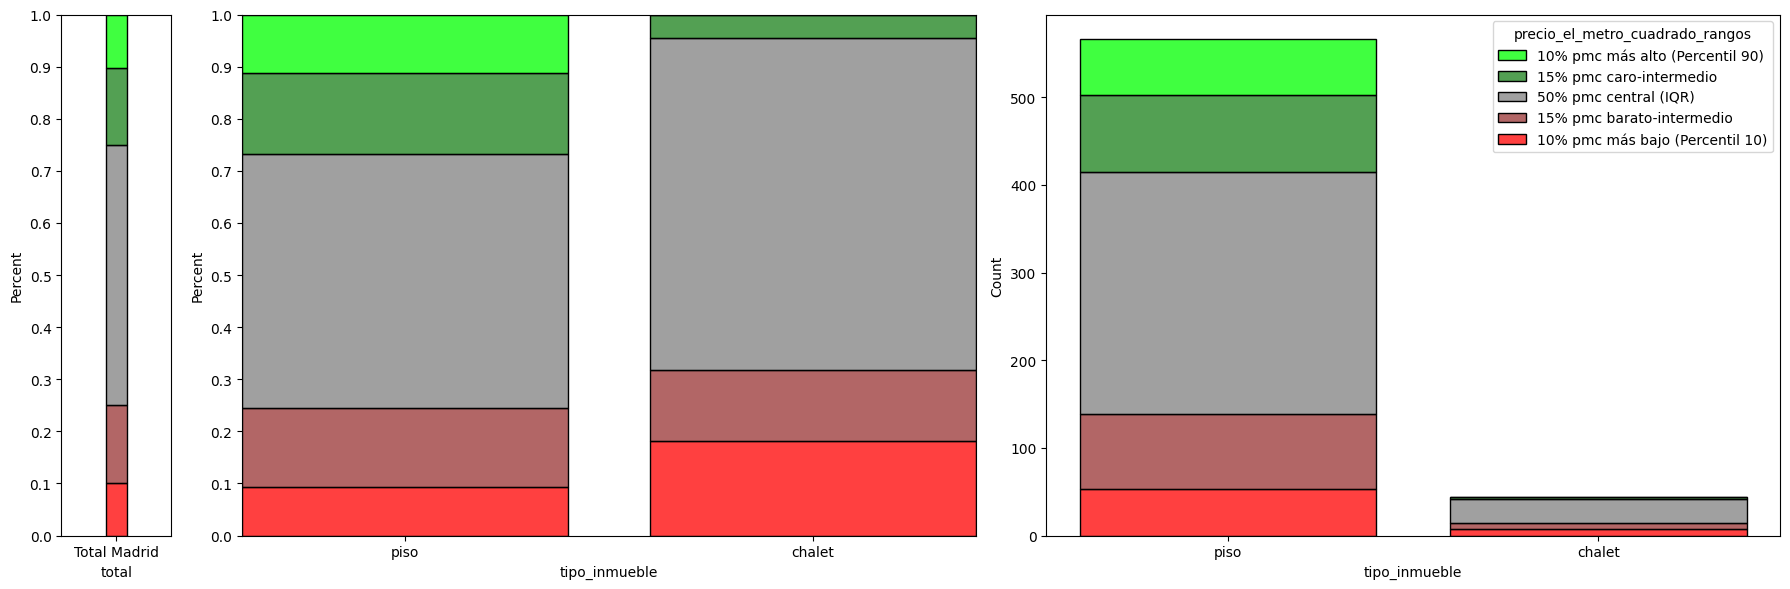

In [45]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="tipo_inmueble", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.8, )
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="tipo_inmueble", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1, shrink=0.8,)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
df['tipo_inmueble'].value_counts()

<Axes: xlabel='centro_periferia', ylabel='precio_el_metro_cuadrado'>

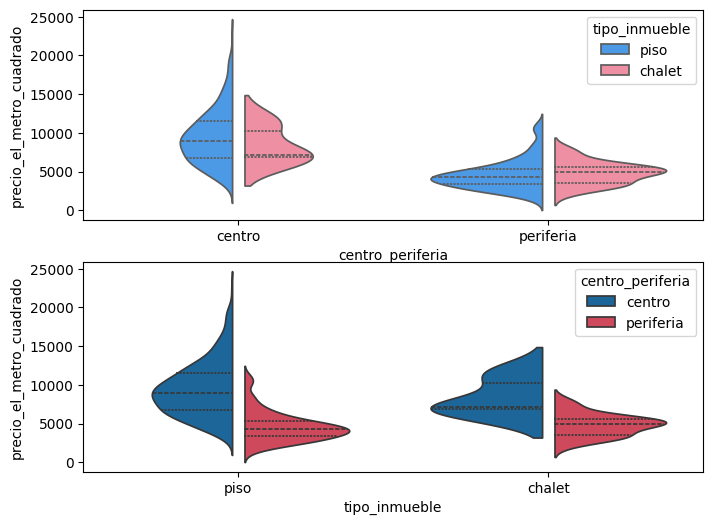

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
sns.violinplot(data=df, x="tipo_inmueble", ax=ax2, y="precio_el_metro_cuadrado", hue="centro_periferia", hue_order=centro_periferia_orden, palette=centro_periferia_colors, split=True, gap=.1, inner="quart")
sns.violinplot(data=df, x="centro_periferia",ax=ax1, y="precio_el_metro_cuadrado", hue="tipo_inmueble", hue_order=tipo_inmueble_orden, palette=tipo_inmueble_colors, order=centro_periferia_orden, split=True, gap=.1, inner="quart")

#### * pmc + `planta`, `planta_rangos(_xl)`

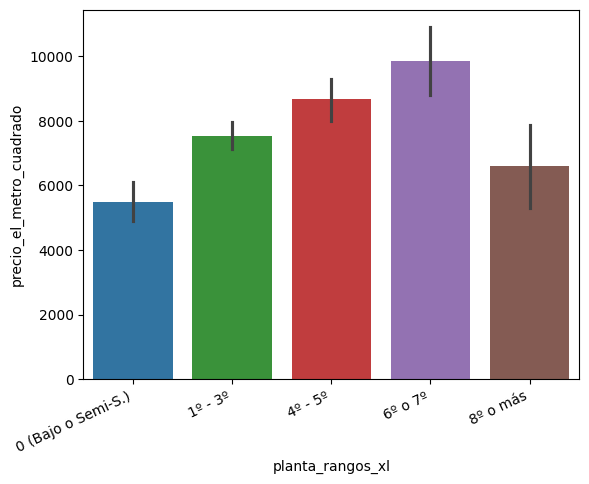

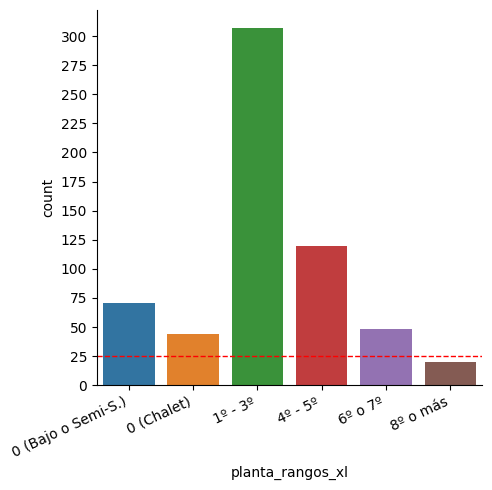

In [47]:
df_count = df.groupby('planta_rangos_xl').size().reset_index(name='count')

sns.barplot(data=df, x="planta_rangos_xl", y="precio_el_metro_cuadrado", hue="planta_rangos_xl", 
hue_order=planta_rangos_xl_colors, order=planta_pisos_rangos_xl_orden)
plt.xticks(rotation=25, ha='right')
plt.show()
g = sns.catplot(df_count, kind="bar", x="planta_rangos_xl", y="count", order=planta_rangos_xl_orden,
hue="planta_rangos_xl", hue_order=planta_rangos_xl_colors)
g.set_xticklabels(rotation=25, ha="right")
g.map(plt.axhline, y=25, color='red', linestyle='--', linewidth=1)
g.axes[0, 0].yaxis.set_major_locator(MultipleLocator(25))
plt.show()

planta_rangos_xl
1º - 3º               307
4º - 5º               120
0 (Bajo o Semi-S.)     71
6º o 7º                48
0 (Chalet)             44
8º o más               20
Name: count, dtype: Int64

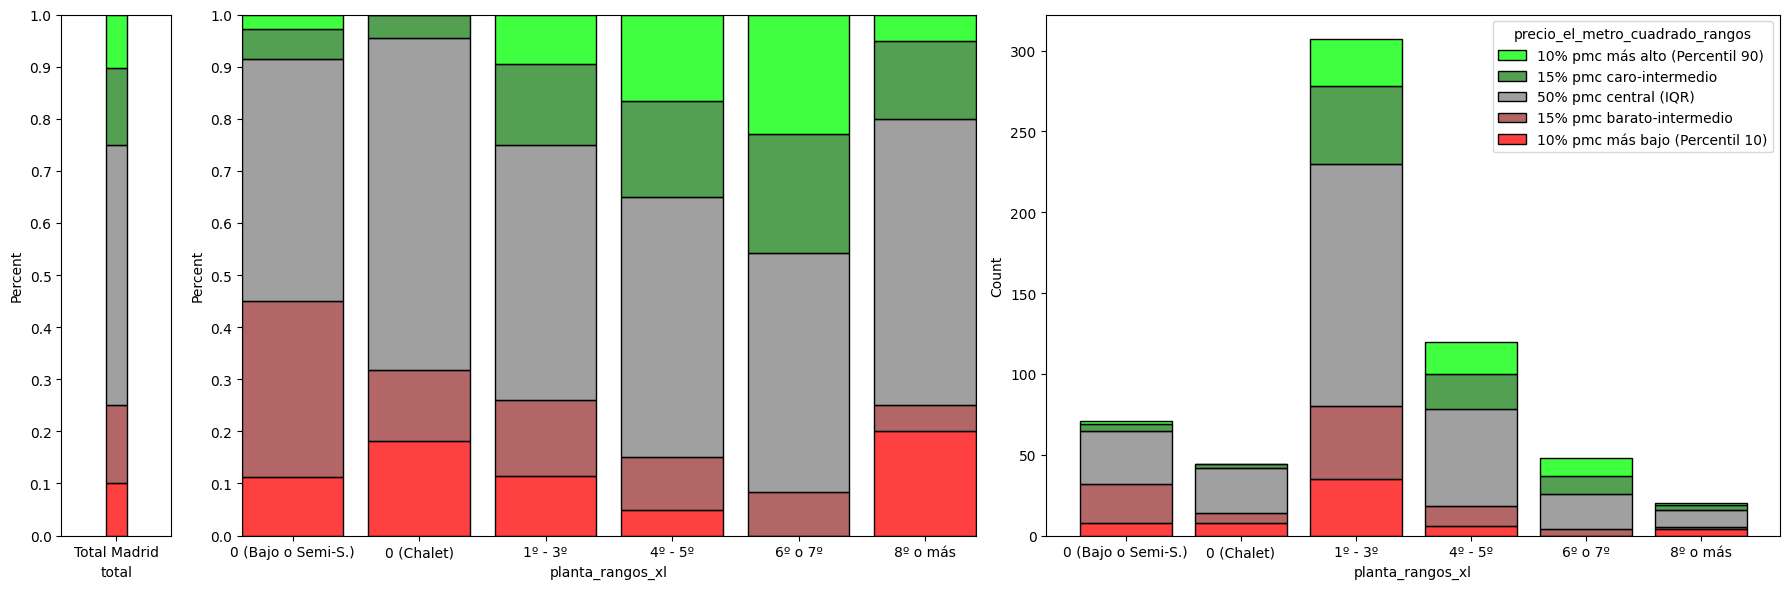

In [48]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot['planta_rangos_xl'] = pd.Categorical(
    df_plot['planta_rangos_xl'],
    categories=planta_rangos_xl_orden,
    ordered=True
)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="planta_rangos_xl", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.8, )
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="planta_rangos_xl", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1, shrink=0.8,)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
df['planta_rangos_xl'].value_counts()

#### * pmc + `exterior_interior`

exterior_interior
exterior    540
interior     70
Name: count, dtype: Int64

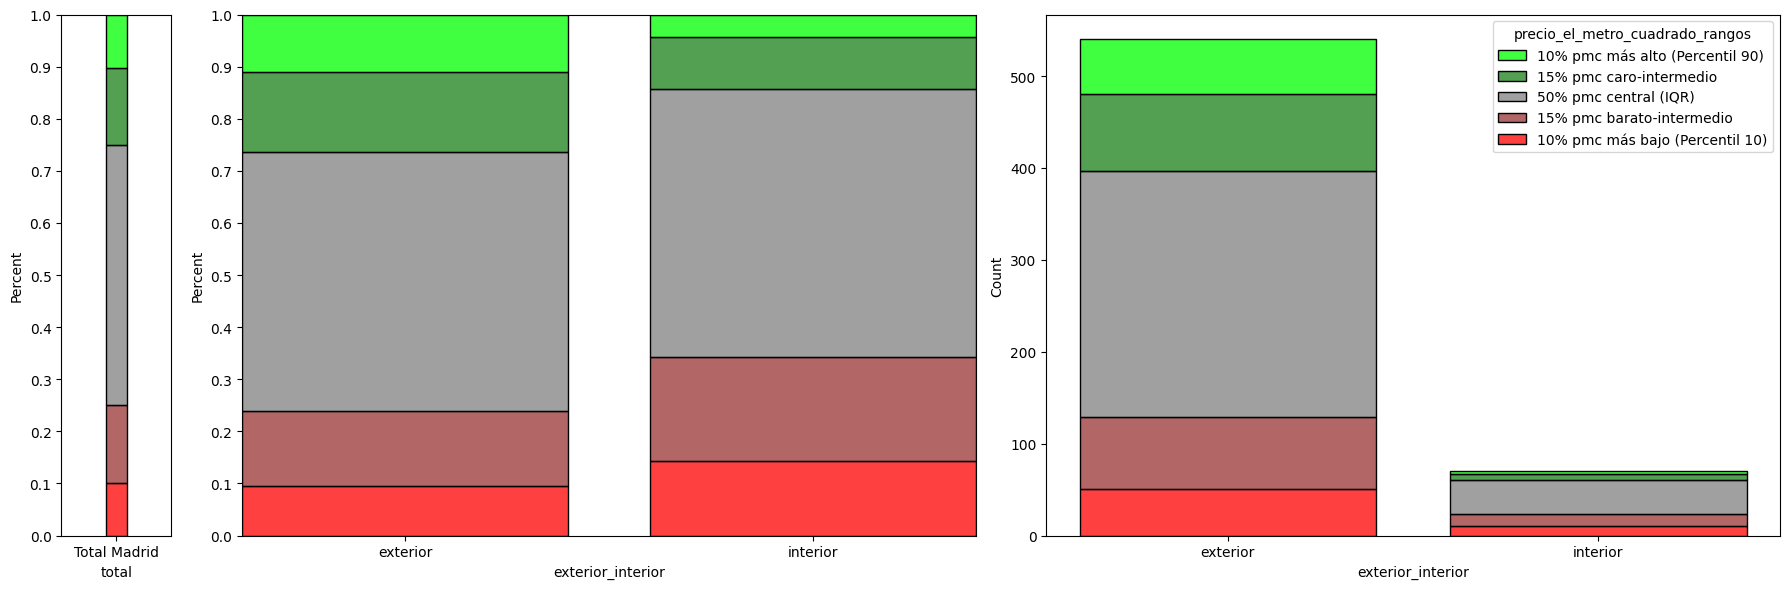

In [49]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="exterior_interior", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.8, )
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="exterior_interior", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1, shrink=0.8,)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
df['exterior_interior'].value_counts()

#### * pmc + `nuevo_usado`

nuevo_usado
obra_usada       499
para_reformar     86
obra_nueva        25
Name: count, dtype: Int64

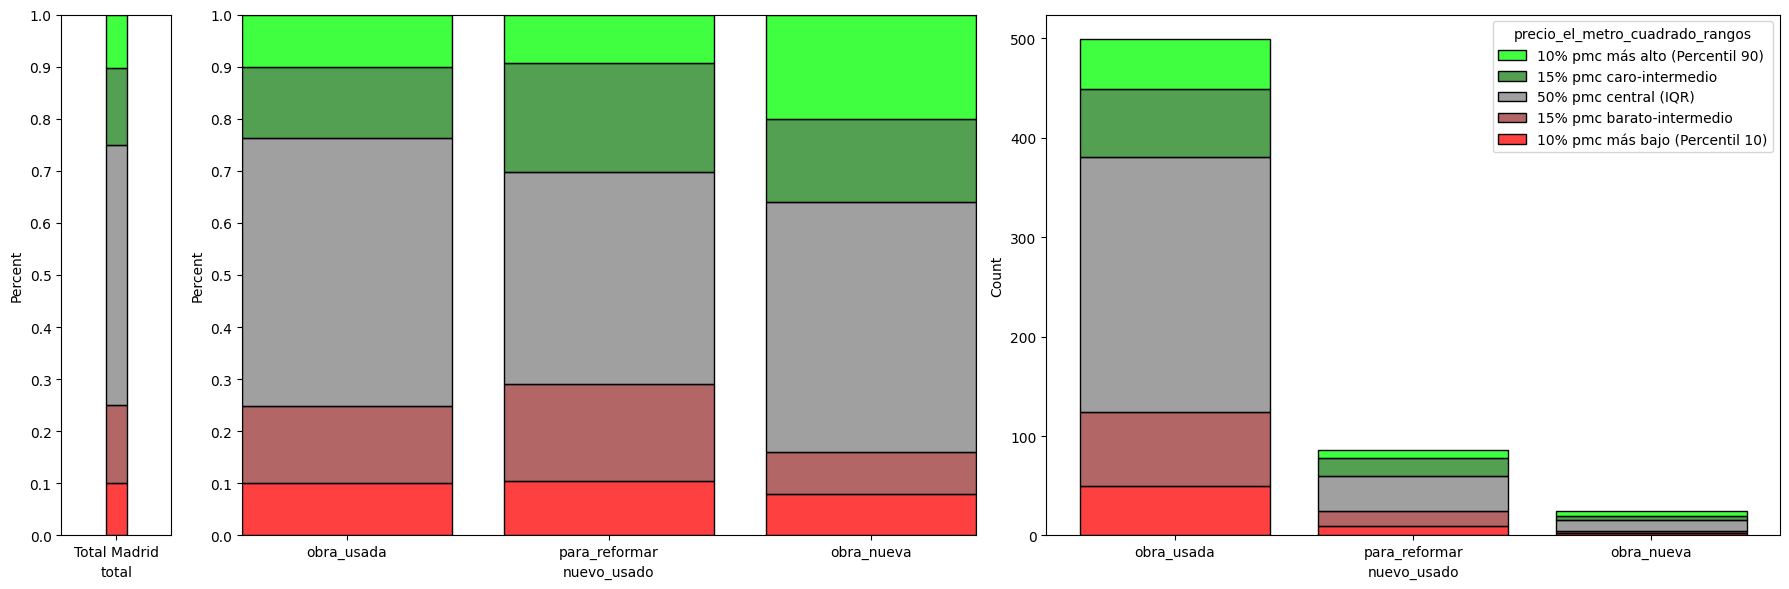

In [50]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="nuevo_usado", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.8, )
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="nuevo_usado", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1, shrink=0.8,)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
df['nuevo_usado'].value_counts()

### ESPACIO

#### * pmc + `metros_cuadrados(_rangos)`

metros_cuadrados_rangos_xl
0-30         9
31-60       86
61-120     242
121-240    149
241-500     67
501<         0
Name: count, dtype: int64

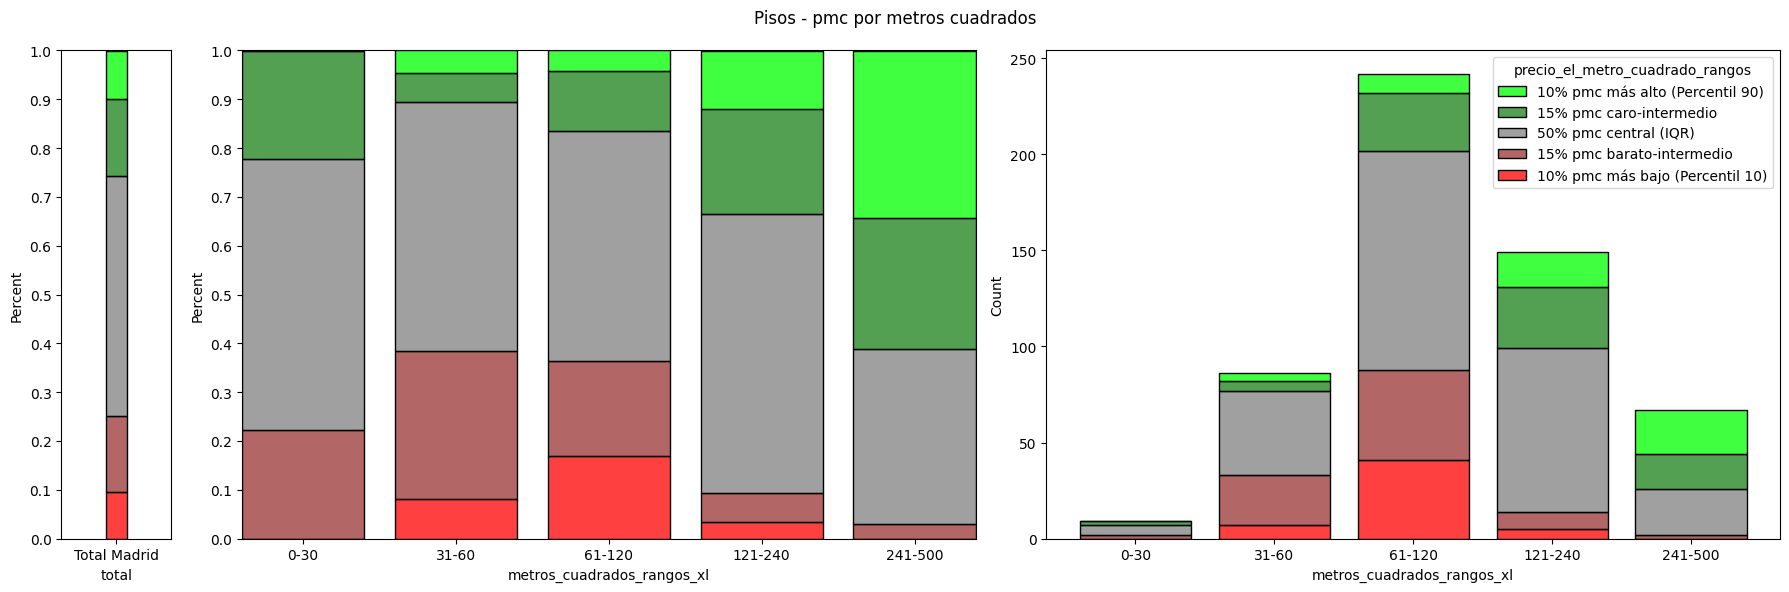

In [51]:
df_plot = df_pisos_sin_outliers_metros_cuadrados.copy()
df_plot['total'] = 'Total Madrid'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="metros_cuadrados_rangos_xl", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.8, )
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="metros_cuadrados_rangos_xl", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1, shrink=0.8,)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()
plt.suptitle('Pisos - pmc por metros cuadrados')
plt.tight_layout()
orden = metros_cuadrados_rangos_xl_orden  # lista con el orden deseado

(df_plot['metros_cuadrados_rangos_xl']
    .value_counts()
    .reindex(orden))

### EQUIPAMIENTOS

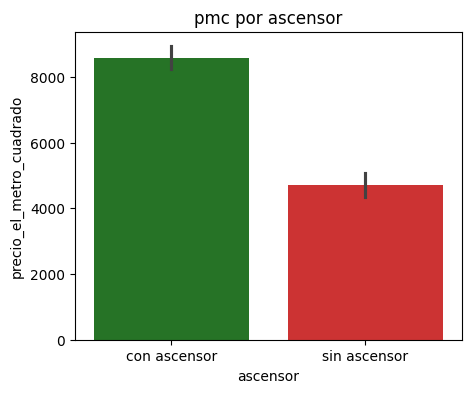

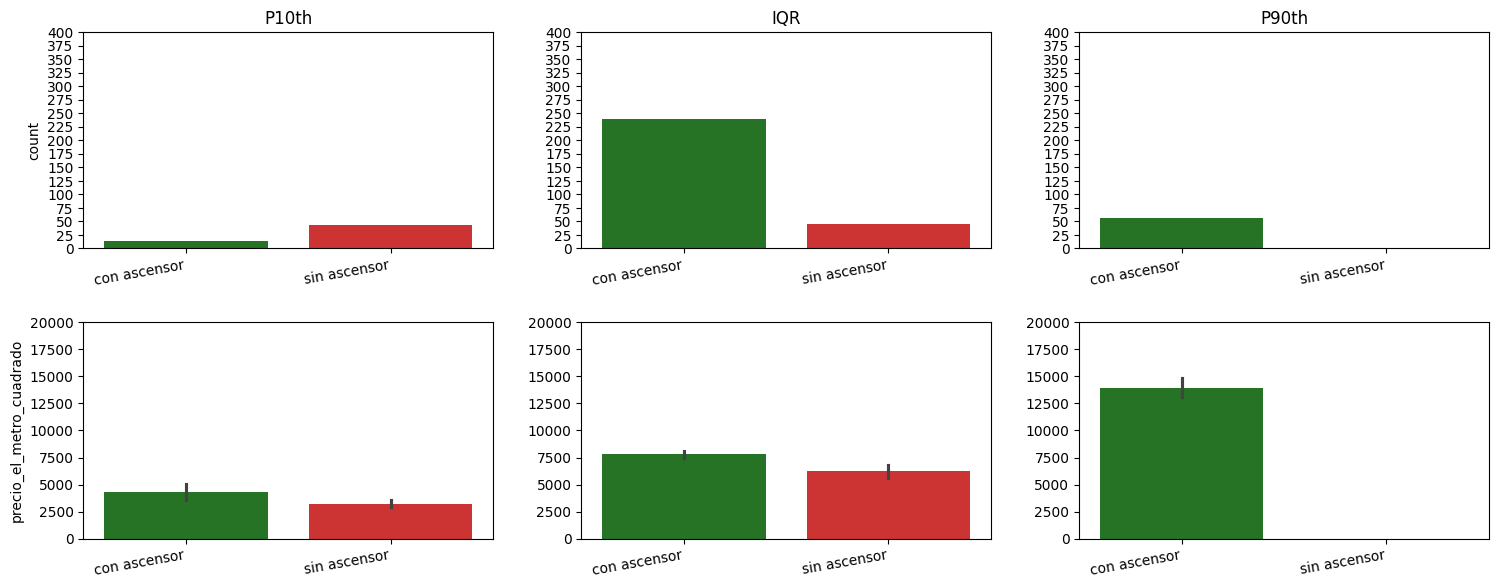

,mean,std,count
ascensor,,,
con ascensor,8578.419919,3729.268098,434
sin ascensor,4693.273187,2097.306357,132


In [52]:
order = ascensor_orden
plt.figure(figsize=(5, 4)) 
sns.barplot(data=df_pisos, x="ascensor", y="precio_el_metro_cuadrado", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
plt.title("pmc por ascensor")
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="ascensor", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="ascensor", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="ascensor", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="ascensor", y="precio_el_metro_cuadrado", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="ascensor", y="precio_el_metro_cuadrado", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="ascensor", y="precio_el_metro_cuadrado", hue='ascensor', order=order, hue_order=order, palette=ascensor_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right')
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_el_metro_cuadrado' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 400) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
[ax.set_ylim(0, 20000) for ax in axes[1]]
[ax.yaxis.set_major_locator(MultipleLocator(2500)) for ax in axes[1]]
plt.show()
df_pisos.groupby("ascensor")["precio_el_metro_cuadrado"].agg(['mean', 'std', 'count'])

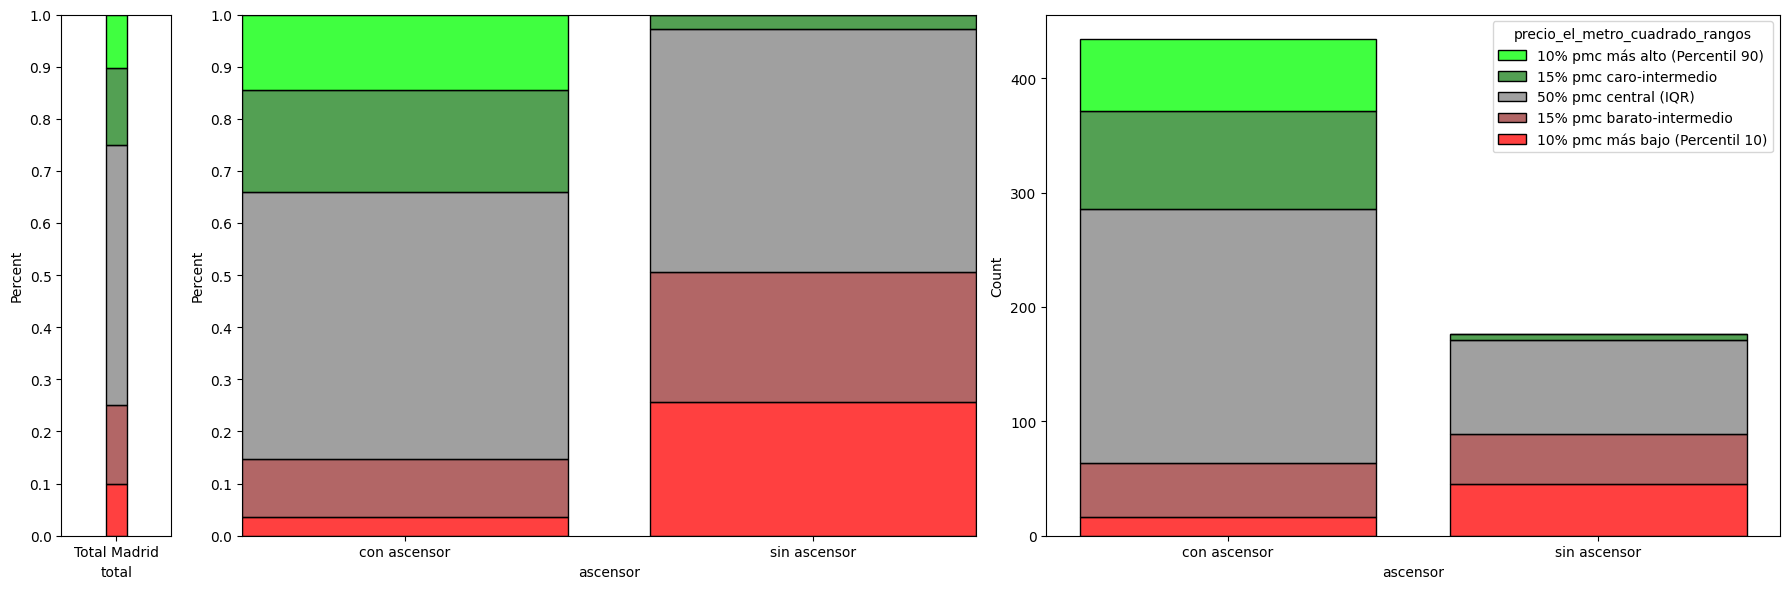

In [53]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["ascensor"] = pd.Categorical(
    df_plot["ascensor"],
    categories=ascensor_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="ascensor", legend=False, shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="ascensor", shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

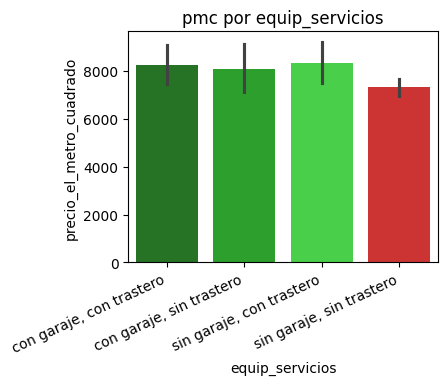

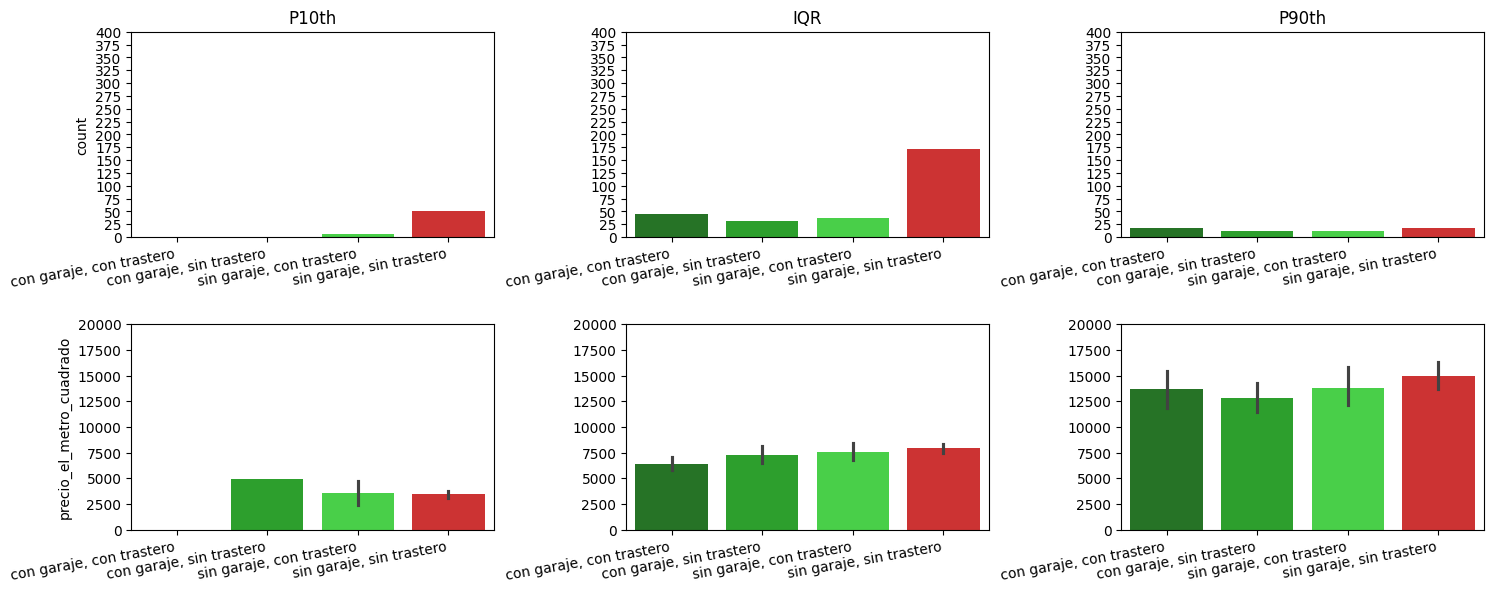

,mean,std,count
equip_servicios,,,
"con garaje, con trastero",8234.169135,3977.026337,91
"con garaje, sin trastero",8090.038665,3584.799495,52
"sin garaje, con trastero",8346.786503,3983.670289,78
"sin garaje, sin trastero",7308.711758,3698.751312,345


In [54]:
order = equip_servicios_orden
plt.figure(figsize=(4, 3)) 
plt.title("pmc por equip_servicios")
sns.barplot(data=df_pisos, x="equip_servicios", y="precio_el_metro_cuadrado", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
plt.xticks(rotation=25, ha='right')
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_servicios", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_servicios", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_servicios", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_servicios", y="precio_el_metro_cuadrado", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_servicios", y="precio_el_metro_cuadrado", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_servicios", y="precio_el_metro_cuadrado", hue='equip_servicios', order=order, hue_order=order, palette=equip_servicios_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_el_metro_cuadrado' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 400) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
[ax.set_ylim(0, 20000) for ax in axes[1]]
[ax.yaxis.set_major_locator(MultipleLocator(2500)) for ax in axes[1]]
plt.show()
df_pisos.groupby("equip_servicios")["precio_el_metro_cuadrado"].agg(['mean', 'std', 'count'])


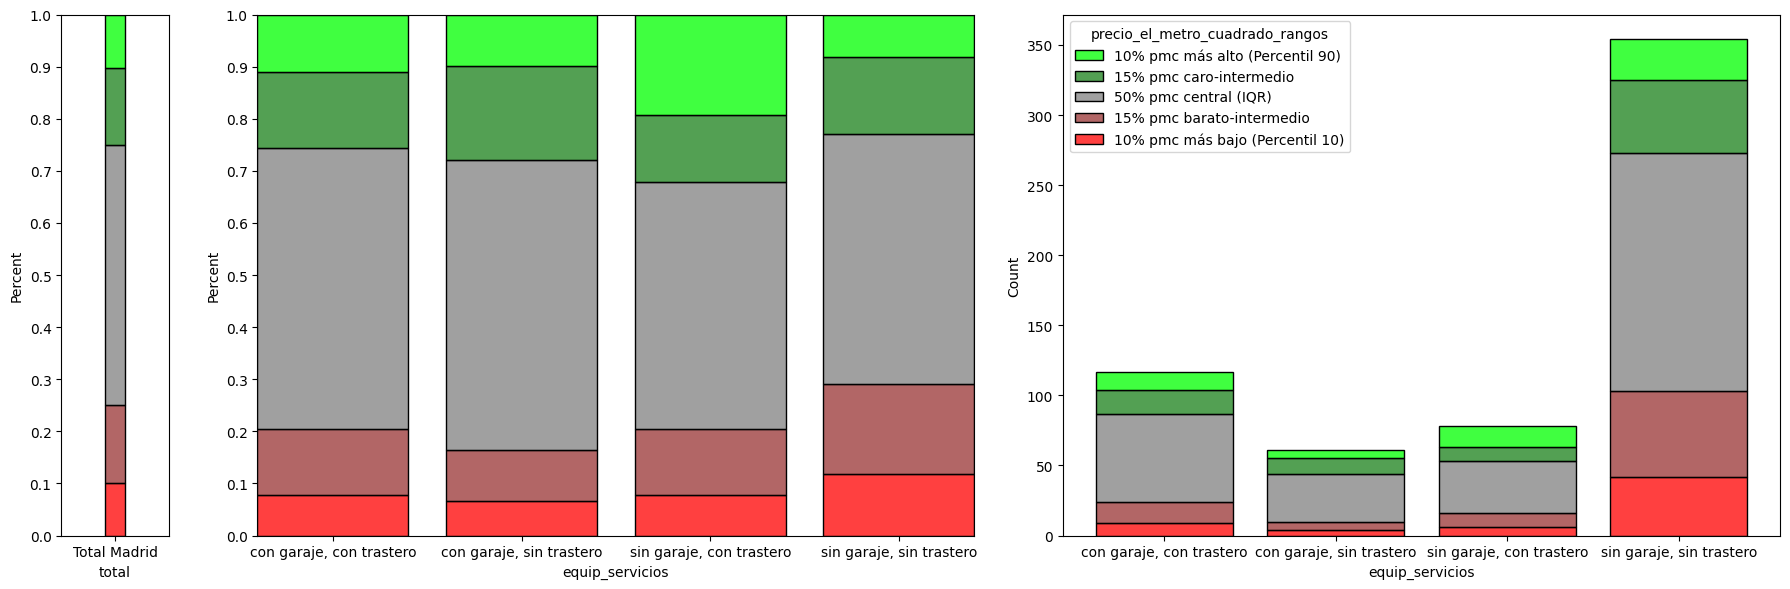

In [55]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_servicios"] = pd.Categorical(
    df_plot["equip_servicios"],
    categories=equip_servicios_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="equip_servicios", legend=False, shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="equip_servicios", shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

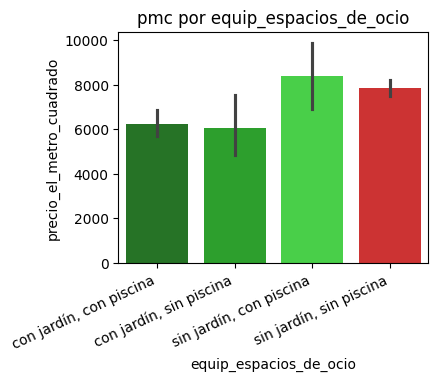

,mean,std,count
equip_espacios_de_ocio,,,
"con jardín, con piscina",6242.365215,2068.426750,48
"con jardín, sin piscina",6041.888833,3391.752581,24
"sin jardín, con piscina",8372.908847,3793.901080,26
"sin jardín, sin piscina",7863.700456,3901.508530,468


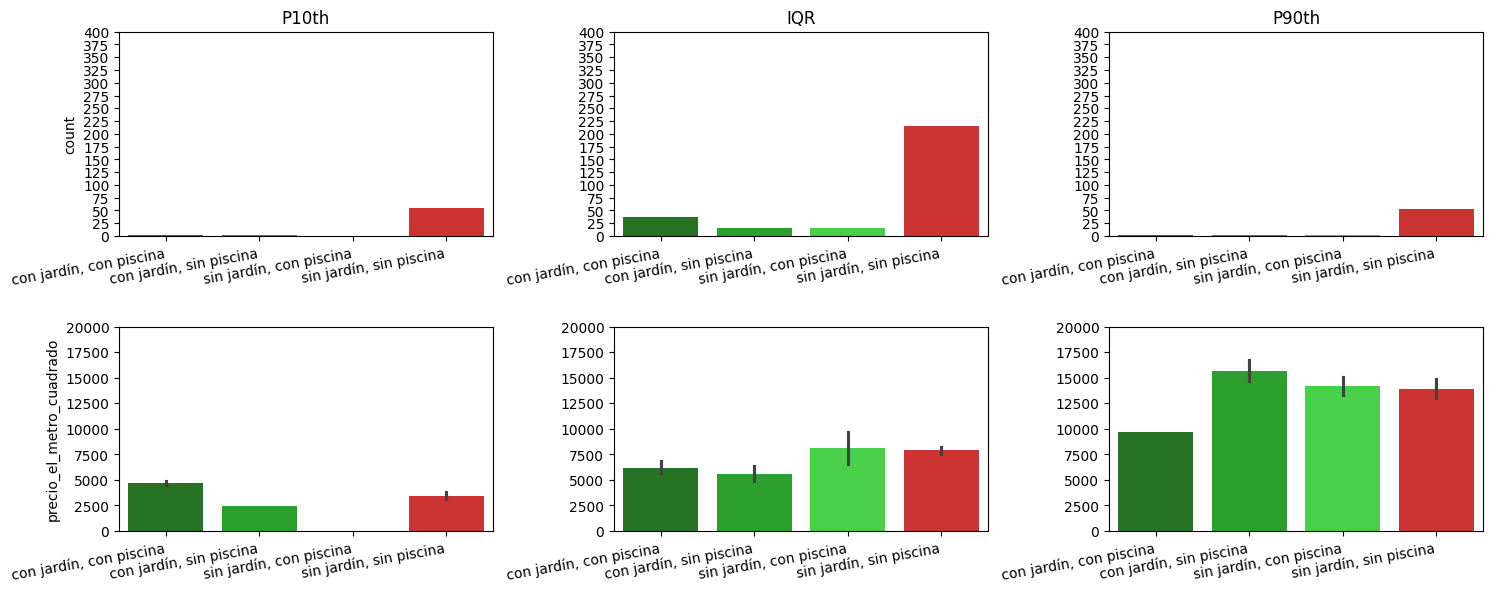

In [56]:
order = equip_espacios_de_ocio_orden
plt.figure(figsize=(4, 3)) 
plt.title("pmc por equip_espacios_de_ocio")
sns.barplot(data=df_pisos, x="equip_espacios_de_ocio", y="precio_el_metro_cuadrado", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
plt.xticks(rotation=25, ha='right')
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_espacios_de_ocio", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_espacios_de_ocio", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_espacios_de_ocio", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_espacios_de_ocio_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_espacios_de_ocio", y="precio_el_metro_cuadrado", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_espacios_de_ocio", y="precio_el_metro_cuadrado", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_servicios_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_espacios_de_ocio", y="precio_el_metro_cuadrado", hue='equip_espacios_de_ocio', order=order, hue_order=order, palette=equip_servicios_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_el_metro_cuadrado' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 400) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
[ax.set_ylim(0, 20000) for ax in axes[1]]
[ax.yaxis.set_major_locator(MultipleLocator(2500)) for ax in axes[1]]
df_pisos.groupby("equip_espacios_de_ocio")["precio_el_metro_cuadrado"].agg(['mean', 'std', 'count'])


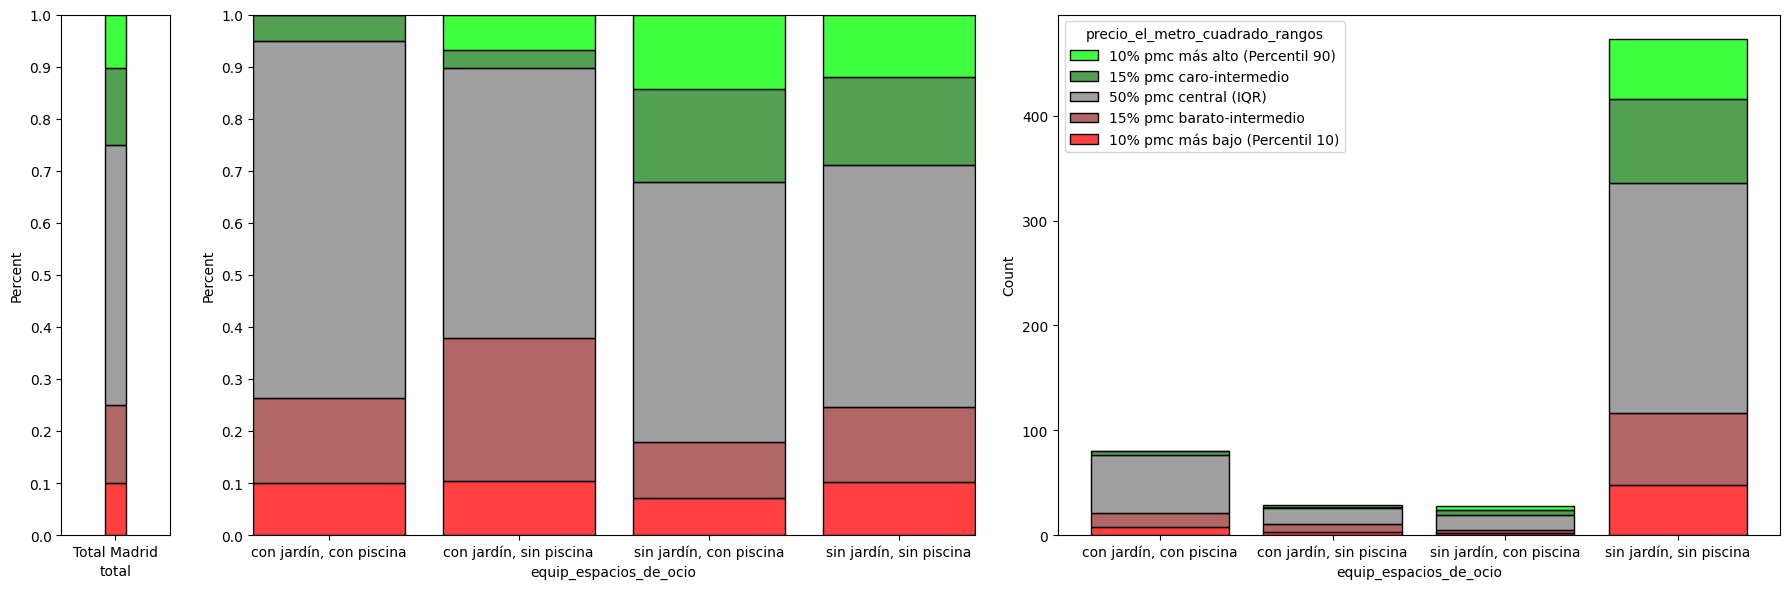

In [57]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_espacios_de_ocio"] = pd.Categorical(
    df_plot["equip_espacios_de_ocio"],
    categories=equip_espacios_de_ocio_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="equip_espacios_de_ocio", legend=False, shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="equip_espacios_de_ocio", shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

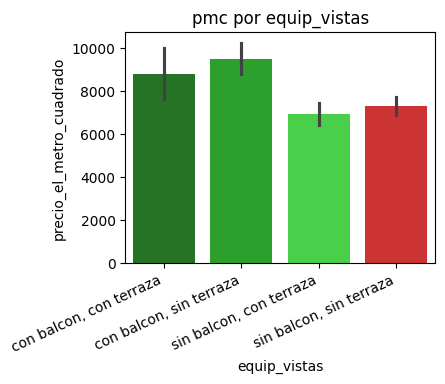

,mean,std,count
equip_vistas,,,
"con balcon, con terraza",8795.312873,4034.582091,40
"con balcon, sin terraza",9499.683343,3914.542558,92
"sin balcon, con terraza",6941.533486,3344.151153,146
"sin balcon, sin terraza",7303.121647,3733.350104,288


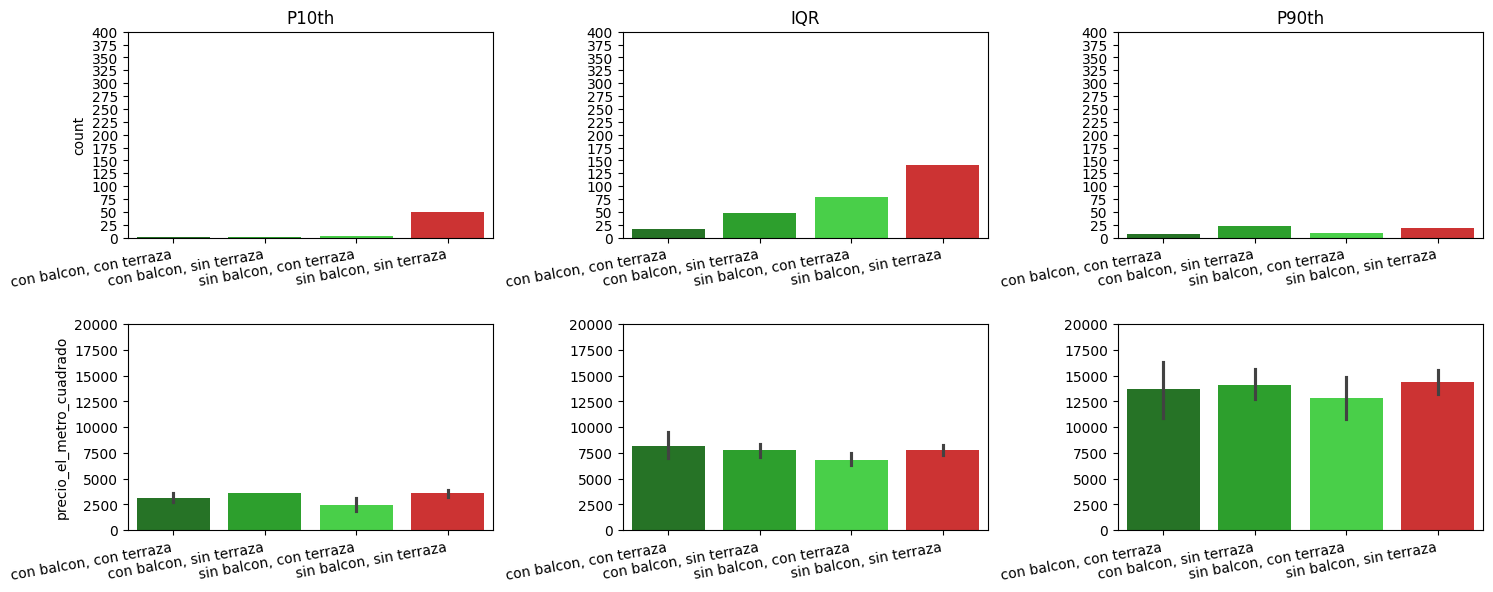

In [58]:
order = equip_vistas_orden
plt.figure(figsize=(4, 3)) 
plt.title("pmc por equip_vistas")
sns.barplot(data=df_pisos, x="equip_vistas", y="precio_el_metro_cuadrado", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
plt.xticks(rotation=25, ha='right')
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_vistas", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_vistas", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_vistas", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_vistas", y="precio_el_metro_cuadrado", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_vistas", y="precio_el_metro_cuadrado", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_vistas", y="precio_el_metro_cuadrado", hue='equip_vistas', order=order, hue_order=order, palette=equip_vistas_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_el_metro_cuadrado' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 400) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
[ax.set_ylim(0, 20000) for ax in axes[1]]
[ax.yaxis.set_major_locator(MultipleLocator(2500)) for ax in axes[1]]
df_pisos.groupby("equip_vistas")["precio_el_metro_cuadrado"].agg(['mean', 'std', 'count'])


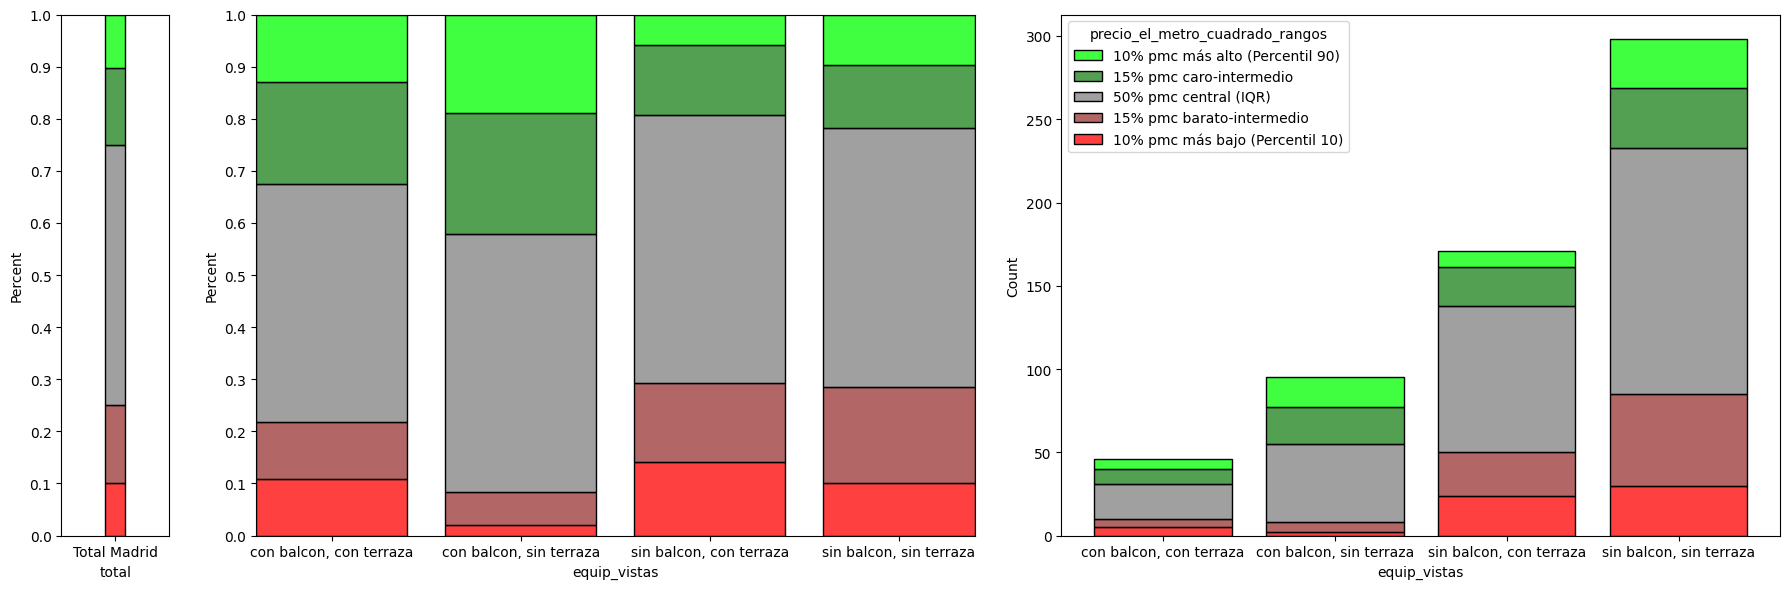

In [59]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_vistas"] = pd.Categorical(
    df_plot["equip_vistas"],
    categories=equip_vistas_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8) 
sns.histplot(data=df_plot,ax=ax2, x="equip_vistas", legend=False, shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="equip_vistas", shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax1.set_yticks(np.arange(0, 1.01, 0.1))
plt.tight_layout()

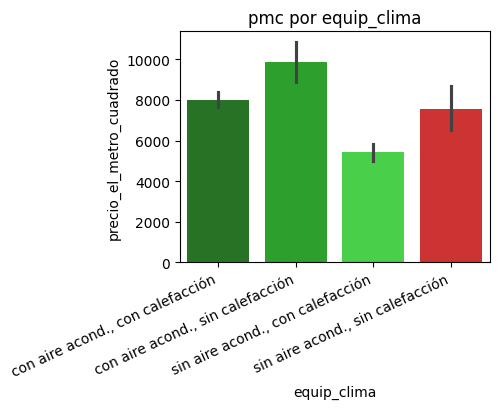

,mean,std,count
equip_clima,,,
"con aire acond., con calefacción",8014.785943,3304.699488,291
"con aire acond., sin calefacción",9873.101741,4572.730435,84
"sin aire acond., con calefacción",5429.014747,2484.287488,124
"sin aire acond., sin calefacción",7577.689875,4603.358201,67


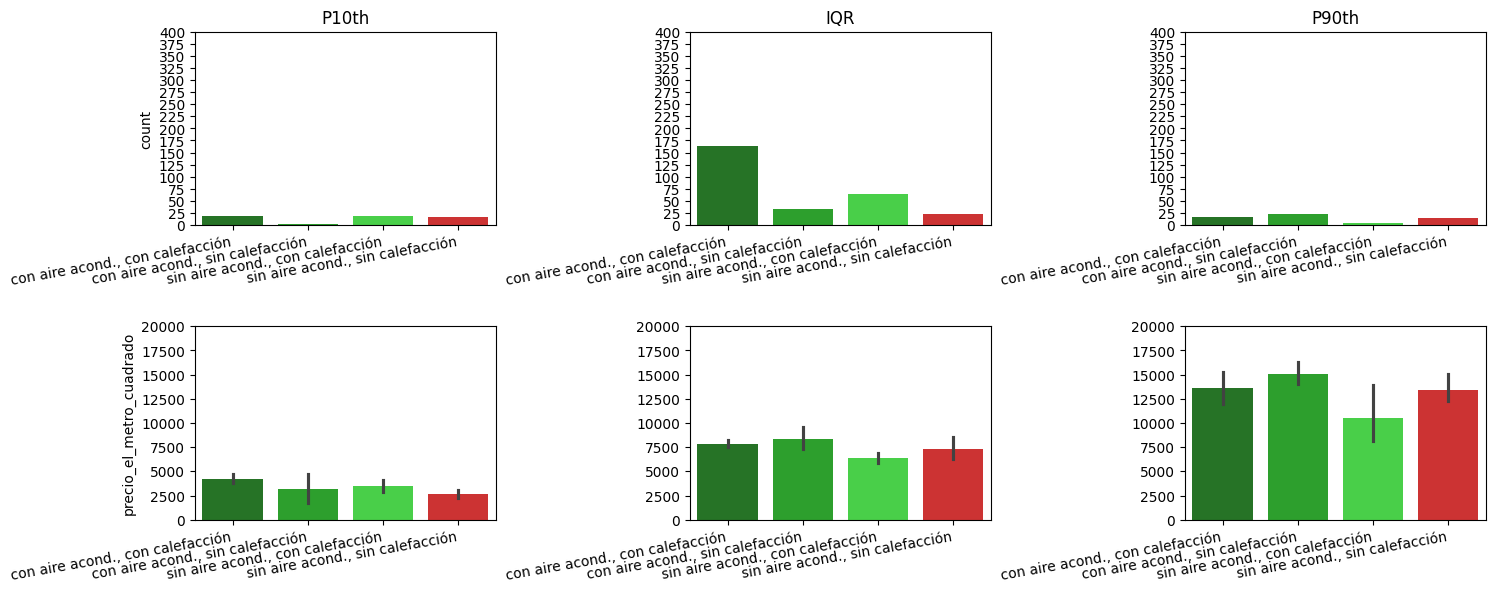

In [60]:
order = equip_clima_orden
plt.figure(figsize=(4, 3)) 
plt.title("pmc por equip_clima")
sns.barplot(data=df_pisos, x="equip_clima", y="precio_el_metro_cuadrado", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
plt.xticks(rotation=25, ha='right')
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
sns.countplot(data=df_pisos_P10, ax=axes[0,0], x="equip_clima", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.countplot(data=df_pisos_IQR, ax=axes[0,1], x="equip_clima", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.countplot(data=df_pisos_P90, ax=axes[0,2], x="equip_clima", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
plt.tight_layout()
sns.barplot(data=df_pisos_P10, ax=axes[1,0], x="equip_clima", y="precio_el_metro_cuadrado", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.barplot(data=df_pisos_IQR, ax=axes[1,1], x="equip_clima", y="precio_el_metro_cuadrado", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
sns.barplot(data=df_pisos_P90, ax=axes[1,2], x="equip_clima", y="precio_el_metro_cuadrado", hue='equip_clima', order=order, hue_order=order, palette=equip_clima_colors)
plt.setp([ax.get_xticklabels() for ax in axes.flatten()], rotation=10, ha='right');
plt.tight_layout()
[ax.set_title(p) for ax, p in zip(axes[0], ['P10th', 'IQR', 'P90th'])]
[ax.set_xlabel('') for ax in axes.flatten()]
[ax.set_ylabel('count' if i == 0 else '') for i, ax in enumerate(axes[0])] + [ax.set_ylabel('precio_el_metro_cuadrado' if i == 0 else '') for i, ax in enumerate(axes[1])];
[ax.set_ylim(0, 400) for ax in axes[0]]
[ax.yaxis.set_major_locator(MultipleLocator(25)) for ax in axes[0]]
[ax.set_ylim(0, 20000) for ax in axes[1]]
[ax.yaxis.set_major_locator(MultipleLocator(2500)) for ax in axes[1]]
df_pisos.groupby("equip_clima")["precio_el_metro_cuadrado"].agg(['mean', 'std', 'count'])


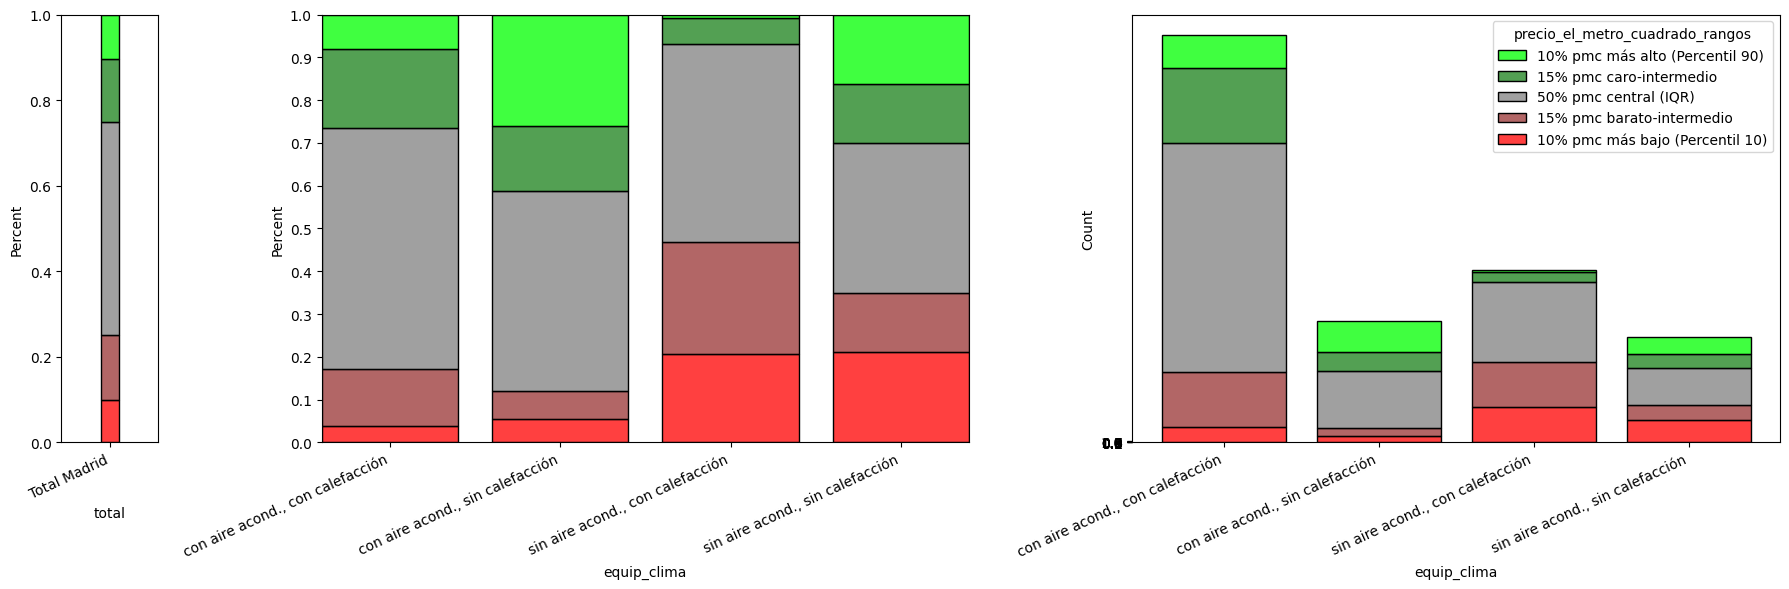

In [61]:
df_plot = df.copy()
df_plot['total'] = 'Total Madrid'
df_plot["equip_clima"] = pd.Categorical(
    df_plot["equip_clima"],
    categories=equip_clima_orden,
    ordered=True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6),gridspec_kw={'width_ratios': [0.3, 2, 2]})
sns.histplot(data=df_plot,ax=ax1, x="total", hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1,legend=False, shrink=0.3, )
ax1.set_xlim(-0.8, 0.8)
sns.histplot(data=df_plot,ax=ax2, x="equip_clima", legend=False, shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="fill", stat='percent', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
sns.histplot(data=df_plot,ax=ax3, x="equip_clima", shrink=0.8, hue="precio_el_metro_cuadrado_rangos", hue_order=precio_el_metro_cuadrado_rangos_orden, multiple="stack", stat='count', palette=precio_el_metro_cuadrado_rangos_colors, bins=1)
ax3.set_yticks(np.arange(0, 1.01, 0.1))

# Rotar etiquetas
[ax.tick_params(axis='x', labelrotation=25) for ax in [ax1, ax2, ax3]]

# Alinear a la derecha
[label.set_ha('right')
 for ax in [ax1, ax2, ax3]
 for label in ax.get_xticklabels()]

plt.tight_layout()